<h1 style="color: #f0822e"><b>Introduction to Bioinformatics</b></h1>

### Project 1- Read mapping and genome assembly

## Part A - Downloading E. Coli WGS data, preliminary analyses, and quality controls


Import neccessary librarires

In [1]:
# Import the SeqIO module from BioPython for reading and writing biological sequence files
from Bio import SeqIO

# Import the itertools module for creating iterators for efficient looping
import itertools

# Import the numpy library for numerical operations and array manipulations
import numpy as np

# Import the os module for interacting with the operating system, such as file manipulation
import os

# Import the seaborn library for statistical data visualization
import seaborn as sns

# Import the pyplot module from matplotlib for creating plots
import matplotlib.pyplot as plt

# Import the display module from IPython for interactive and rich display capabilities
from IPython import display

Define fastq file path.

In [2]:
fastq_file_path = 'data/SRR8185316.fastq'

### <span style="color: #deb916">I. Count total number of reads in the fastq file</span>

In [3]:
def count_reads(fastq_file_path):
    '''This function takes a file path to a Fastq file as input and returns the number of reads.'''
    reads = 0
    with open(fastq_file_path, "r") as handle:
        records = SeqIO.parse(handle, "fastq")

        for record in records:
            reads += 1
        
    return reads

reads = count_reads(fastq_file_path)
print(f"Total number of reads: {reads}")

Total number of reads: 2297280


### <span style="color: #deb916">II. Print the identifier, quality, and sequence of the first read of the fastq file. </span>

In [4]:
def fisrt_record_data(fastq_file_path):
    '''This function trys to print the first record's id,
    sequence, and quality if there is some in the fastq file.'''
    with open(fastq_file_path, "r") as handle:
        records = SeqIO.parse(handle, "fastq")

        # Find first records amoung records
        first_record = next(records, None)
        
        # If fastq file is not empty:
        if first_record:
            print(f"First record's Identifier: {first_record.id}\n\n",
                  f"Fisrt record's Sequence:\n{first_record.seq}\n\n",
                  f"First record's Quality:\n{np.array(first_record.letter_annotations['phred_quality'])}")
        
        # If fastq file is empty:
        else:
            print("There is no reads in the file yet!")
    return
    
fisrt_record_data(fastq_file_path)

First record's Identifier: SRR8185316.1

 Fisrt record's Sequence:
AGCGGTACACATTATGGGTCTGCTCTCCGCAGGCGGCGTACACAGCCACGAAGATCACATCATGGCGATGGTAGAACTGGCAGCTGAACGCGGCGCAGAA

 First record's Quality:
[40 40 38 40 40 40 40 40 40 40 40 40 40 40 40 39 40 40 40 40 40 40 40 40
 40 40 40 40 40 40 40 40 40 31 40 39 39 36 39 40 40 40 40 40 40 40 40 40
 40 40 39 40 40 39 40 40 40 40 40 40 40 40 38 40 39 40 40 39 37 40 40 36
 40 40 38 40 39 39 38 39 31 33 36 18 33 33 29 31 29 29 17 30 31 23 30 29
 30 32 31 16]


### <span style="color: #deb916">III. Count number of times that the <b>TTAAATGGAA</b> subsequence appeared in the file</span>

In [5]:
def count_sunsequence_repetitions(fastq_file_path, subsequence):

    number_of_repetitions = 0
    with open(fastq_file_path, "r") as handle:
        records = SeqIO.parse(handle, "fastq")

        # For each record, check if the subsequence is in its sequence:
        for record in records:
            sequence = str(record.seq)
            if subsequence in sequence:
                number_of_repetitions += 1
    
    # return number of repetitions of the subsequence
    return number_of_repetitions


print("Number of occurances of the subsequence TTAAATGGAA: ", count_sunsequence_repetitions(fastq_file_path, "TTAAATGGAA"))

Number of occurances of the subsequence TTAAATGGAA:  179


### <span style="color: #deb916">IV. Extract the first 1000 sequences of the fastq files (4000 lines)</span>

In [6]:
def extract_fisrt_1000_sequnces(fastq_file_path, extract_file_path):

    with open(fastq_file_path, "r") as input_handle, open(extract_file_path, "w") as output_handle:

        records = SeqIO.parse(input_handle, "fastq")
    
        first_1000_records = itertools.islice(records, 1000)

        SeqIO.write(first_1000_records, output_handle, "fastq")
        
    return

Make ```1000firstReads``` directory and store the first 1000 sequences of the fastq file in it.

In [7]:
# Make directory if it does not exist
directory_path = "1000firstReads"
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Join file path
file_name = "first_1000_records.fastq"
extract_file_path = os.path.join(directory_path, file_name)

extract_fisrt_1000_sequnces(fastq_file_path, extract_file_path)

### <span style="color: #deb916">V. Plot the quality of the reads in the fastq file using a box plot.</span>

\begin{equation*}
Q=-10log_{10}P,\;\; P: \; Error\;probability
\end{equation*}

In [8]:
def extract_quality_scores(fastq_file_path):
    '''This function calculates Phred Score for first 100000
    reads and return them.'''
    QS = []
    with open(fastq_file_path, "r") as handle:
        records = SeqIO.parse(handle, "fastq")

        first_100000_records = itertools.islice(records, 100000)
        for record in first_100000_records:
            QS.extend(record.letter_annotations["phred_quality"])
    return QS

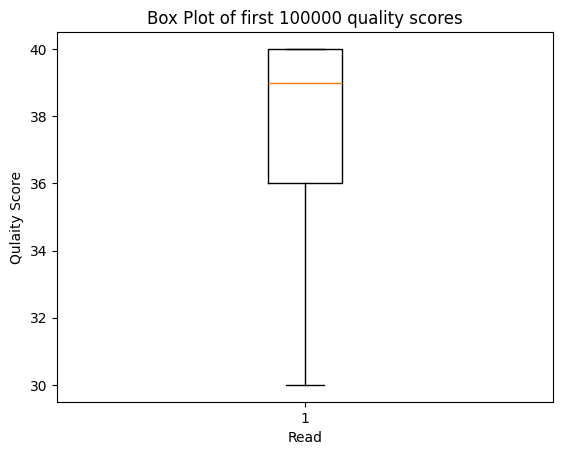

In [9]:
def plot_quality_scores(quality_scores):
    '''This function plots the box plot of quality scores
    of first 100000 reads'''

    # Set showfliers to False to ignore outliers
    plt.boxplot(quality_scores, showfliers=False)
    plt.xlabel("Read")
    plt.ylabel("Qulaity Score")
    plt.title("Box Plot of first 100000 quality scores")
    
    plt.show()


plot_quality_scores(extract_quality_scores(fastq_file_path))

As it is obvious from the above box plot, quality scores are distributed between 35 and 40 without determining the outliers. This range is good enoght and means that the error chance is extremely low.

### <span style="color: #deb916">VI. Show the distribution of read lengths using a density plot</span>

In [10]:
def extract_read_lengths(fastq_file_path):
    '''This function counts length of each read in the file.'''
    # List to store the lengths of reads in the FastQ file
    read_lengths = []

    # Open the FastQ file for reading
    with open(fastq_file_path, "r") as handle:
        # Parse the FastQ records using SeqIO.parse
        records = SeqIO.parse(handle, "fastq")
        
        # Iterate through each record and store the length of the read in the list
        read_lengths = [len(record) for record in records]

    # Return the list of read lengths
    return read_lengths


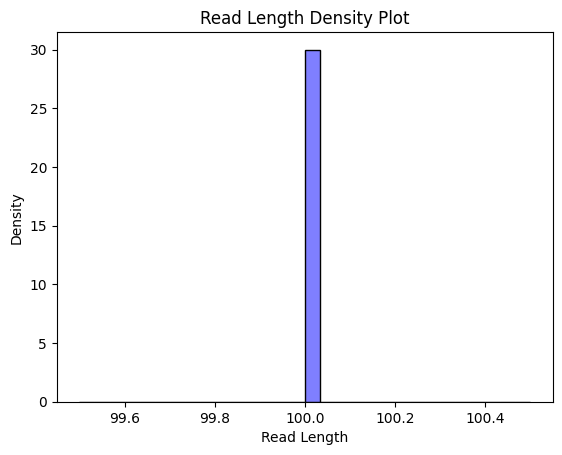

In [11]:
def plot_read_length_density(read_lengths):
    # Use seaborn to create a density plot
    sns.histplot(read_lengths, kde=True, color="blue", stat="density", bins=30)

    # Set x-axis label
    plt.xlabel("Read Length")
    # Set y-axis label
    plt.ylabel("Density")
    # Set the title of the plot
    plt.title("Read Length Density Plot")

    # Display the plot
    plt.show()

plot_read_length_density(extract_read_lengths(fastq_file_path))


In [12]:
def analyze_fastq(fastq_file):
    # Count the number of reads
    num_reads = sum(1 for record in SeqIO.parse(fastq_file, "fastq"))

    # Get the length of the first read
    first_read_length = len(next(SeqIO.parse(fastq_file, "fastq")).seq)

    # Display the results
    print(f"Number of reads: {num_reads}")
    print(f"Length of the first read: {first_read_length} bases")



In [13]:
analyze_fastq(fastq_file_path)

Number of reads: 2297280
Length of the first read: 100 bases


### <span style="color: #c70000"> FastQC Results</span>

#### <span style="color: #ba6c6c">Per base sequence quality</span>

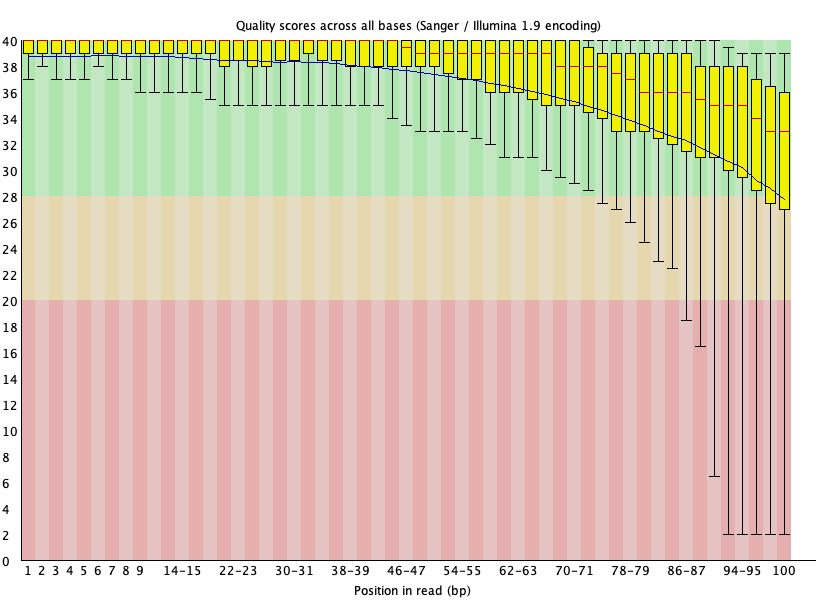

In [14]:
per_base_sequence_quality = "QC_results/SRR8185316_fastqc/Images/per_base_quality.png"
display.Image(per_base_sequence_quality, width=500)

In the above diagram, for each position in all reads, a box plot is prepared. These boxes show the quality score of the corresponding positions in the reads. Phred scores are logarithmically scaled, meaning a higher score indicates higher base call accuracy. All boxes are in the green area which means that the sequencing is done properly. In fact, the mean value of scores in each base(the blue thin line) is something between 30-40 which indicates a good Phred score with low error probability($0.0001 \le P \le 0.001$).

Also, quality scores drop towards the end of reads which is common. This means that as the length of reads increases, the error probability increases too. So, too long reads are not a good choice for sequancing process and it is better to fragment long reads into shorter ones.


#### <span style="color: #ba6c6c">Per sequence quality scores</span>

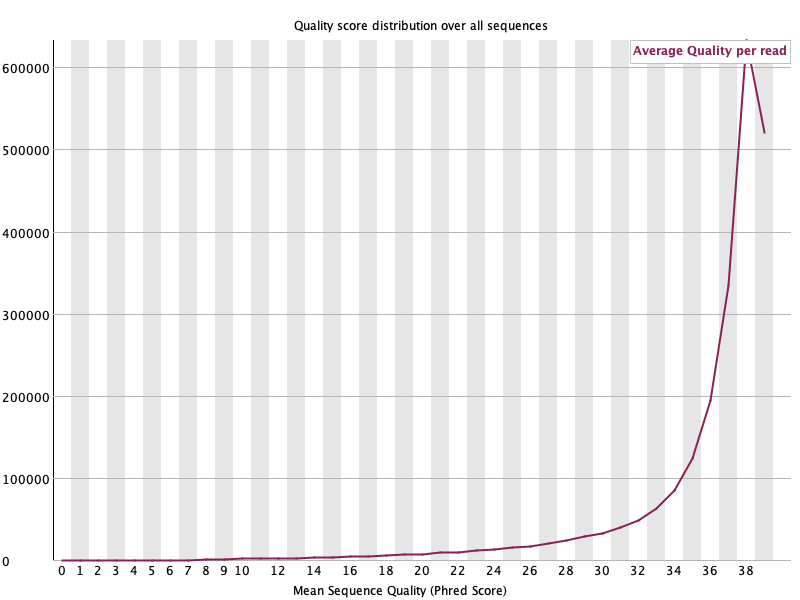

In [15]:
per_sequence_quality = "QC_results/SRR8185316_fastqc/Images/per_sequence_quality.png"
display.Image(per_sequence_quality, width=500)

Each (x, y) in the above diagram shoes the number of reads(y) with average quality score x. The sharp peak is a good news because it shows that with a sudden flow up, the average quality score per read increases and most of the reads have hig quality.

#### <span style="color: #ba6c6c">Per base sequence content</span>

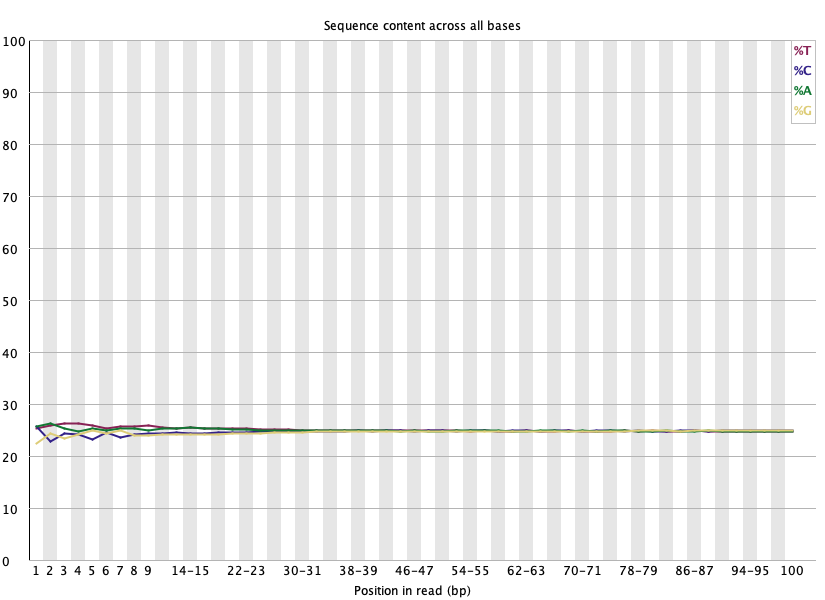

In [16]:
per_base_sequence_content = "QC_results/SRR8185316_fastqc/Images/per_base_sequence_content.png"
display.Image(per_base_sequence_content, width=500)

The above diagram plots the proportion of each base position over all of the reads. Typically, we expect to see each base roughly 25% of the time at each position, but this often fails at the beginning or end of the read due to quality or adapter content. As you can see in the last diagram, until base 30, lines are not flat but they are near 25% and from base 30 to 100 lines are flat and tightly near 25%. 

#### <span style="color: #ba6c6c">Per sequence GC content</span>

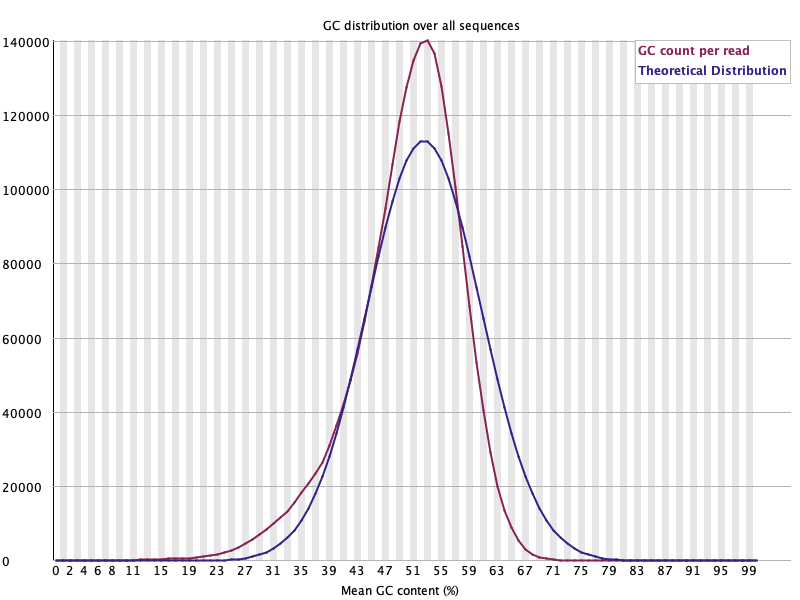

In [17]:
per_sequence_GC_content = "QC_results/SRR8185316_fastqc/Images/per_sequence_gc_content.png"
display.Image(per_sequence_GC_content, width=500)

The above picture shows a density plot of average GC content in each of the reads. As it is abvious from the plot, the best GC content happens when the GC count per read diagram has a normal distribution and always be at the top of the theoretical distribution. But in our data, results are some how different from the ideal case. Althogh, it is not that much bad!

#### <span style="color: #ba6c6c">Per base N content</span>

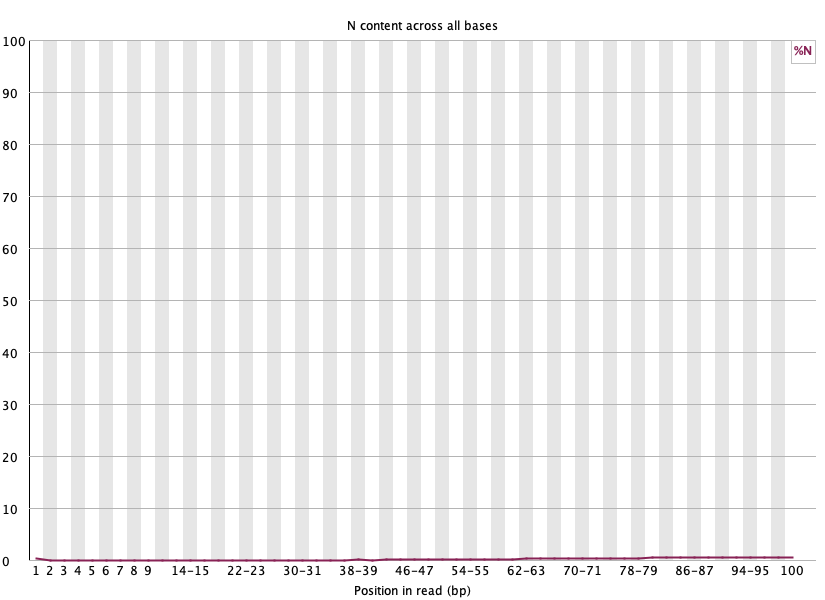

In [18]:
per_base_N_content = "QC_results/SRR8185316_fastqc/Images/per_base_n_content.png"
display.Image(per_base_N_content, width=500)

This line graph shows us the average numbers of Ns found across all reads of the sample. As it is tight to 0, approximately, there is no Ns in the reads and this is out ideal because there is almost no base in any reads which is ambigious.

#### <span style="color: #ba6c6c">Sequence Length Distribution</span>

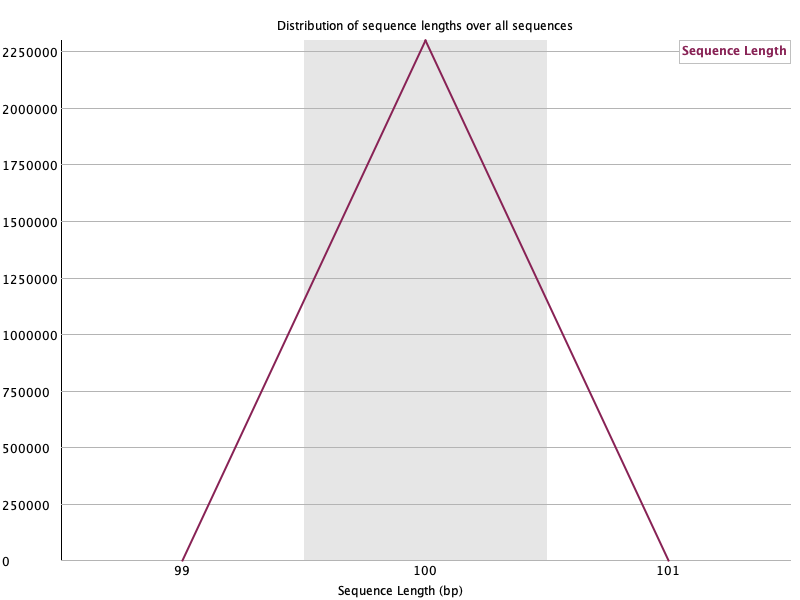

In [19]:
sequence_length_dist = "QC_results/SRR8185316_fastqc/Images/sequence_length_distribution.png"
display.Image(sequence_length_dist, width=500)

The above diagrams shows that length of each read in the dataset is exaclty 100.

#### <span style="color: #ba6c6c">Sequence Duplication Levels</span>

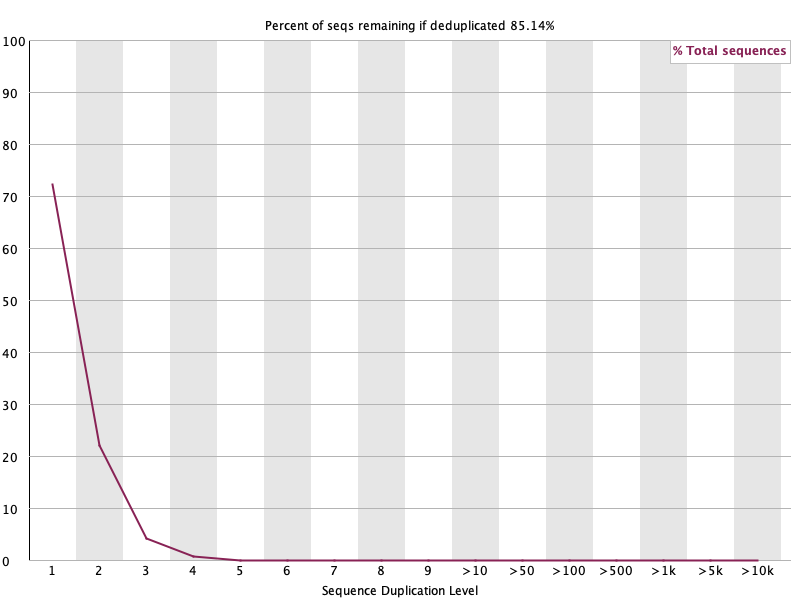

In [20]:
sequence_duplication_levels = "QC_results/SRR8185316_fastqc/Images/sequence_duplication_levels.png"
display.Image(sequence_duplication_levels, width=500)

In the above plot, the duplication levels refer to the redundancy or repetition of identical sequences within the dataset. The peak at low duplication levels indicates a diverse library with a low degree of redundancy. So, there is only a few redundant reads in our dataset which is ideal.

#### <span style="color: #ba6c6c">Overrepresented sequences</span>

No overrepresented sequences

As there is only a few redundant reads in the data, no overrepresented sequences was found.

#### <span style="color: #ba6c6c">Adapter Content</span>

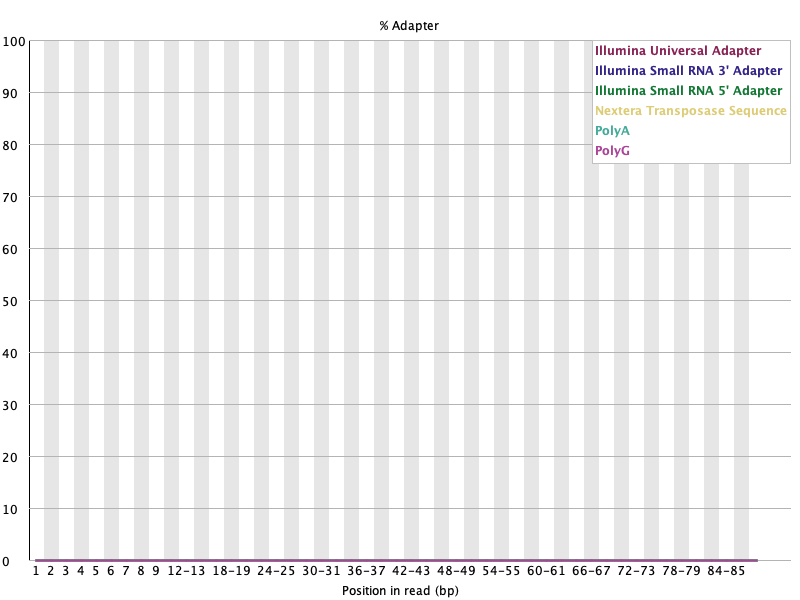

In [21]:
adaptor_content = "QC_results/SRR8185316_fastqc/Images/adapter_content.png"
display.Image(adaptor_content, width=500)

The "Adapter Content" provides information about the presence and abundance of adapter sequences in our sequencing data. Adapter sequences are short DNA sequences used in library preparation that should ideally be removed before downstream analysis. So, as the line in this diagram is tanget to 0, there is no adaptor to remove.

## Part B - De novo genome assembly

### <span style="color: #15a13a"> 1. Run SPAdes to generate draft genome assemblies from short reads.</span>

I tried to run ```spades.py -s SRR8185316.fastq -o spadesOutput``` but the command did not run properly on macOS. Thus, I ran it on a Linux system and copied the results to the ```spadesOutput``` directory. The output typically includes several files and directories, one of the most important ones is named ```contigs.fasta```. This file contains the assembled contigs, which are the contiguous sequences of DNA that the assembler has inferred from the input sequencing data and we will use it in QUAST in the following.

### <span style="color: #15a13a"> 2. Assess the quality of the draft genome assembly using Quast and compare it to the reference genome.</span>

I ran ```quast.py -o ./quastOutput -r ./referenceGnome/sequence.fasta ./spadesOutput/contigs.fasta``` on macOS but it gave me some incomplete results in the reports which are located in the ```quastOutputMac```. So, I ran it on Linux and put the html reports in  ```qustOutput``` directory which I will interpret them in the following:

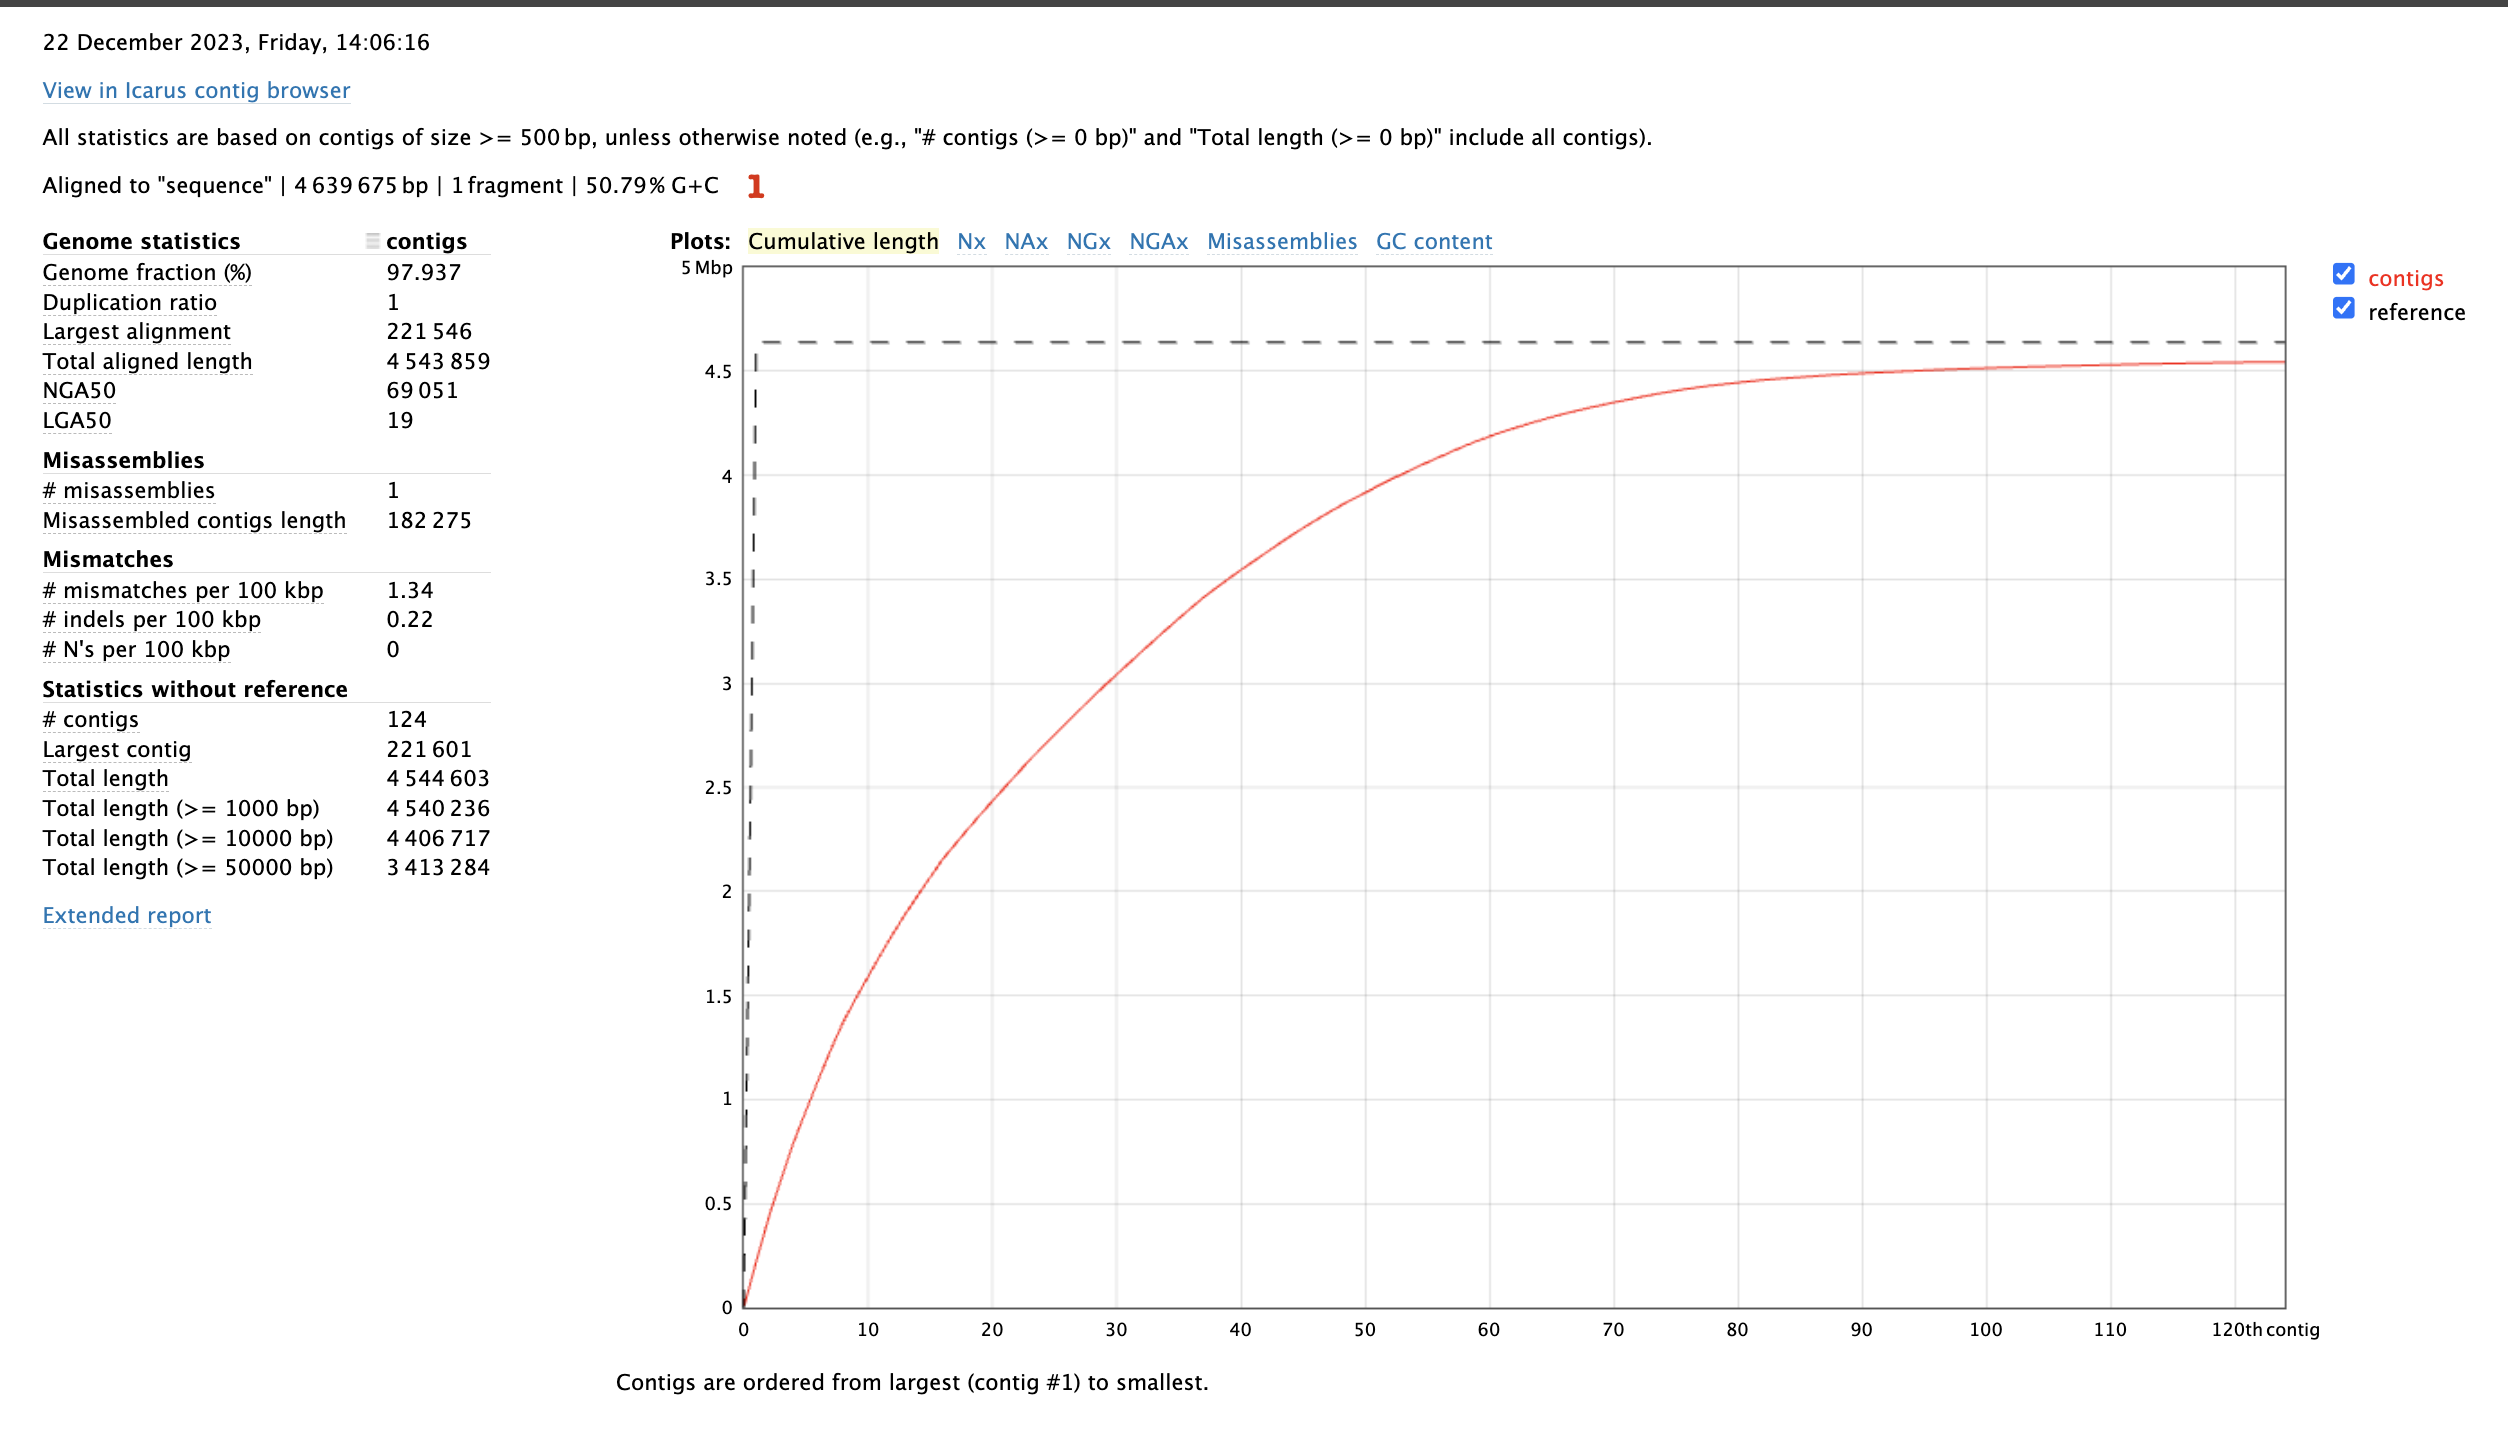

In [22]:
quast_report = "quastOutput/reports/report.png"
display.Image(quast_report, width=500)

as it is mentioned in the top of the report, only those contigs that are equal to or longer than 500 base pairs (bp) in length are used.

In the section which is marked with '1' in the above figure, it is reported that the total number of base pairs covered by the alignment of the assembled contigs to the reference sequence is 4,639,675 bp.

Also, the term "fragment" typically refers to a single contiguous piece or unit of DNA and '50.79 % G+C' indicates the G+C content of the aligned region. 50.79% represents the proportion of bases in the aligned region that are either guanine (G) or cytosine (C).

### <span style="color: #98d9be">Reports</span>

#### <span style="color: #98d9be">Genome statistics</span>

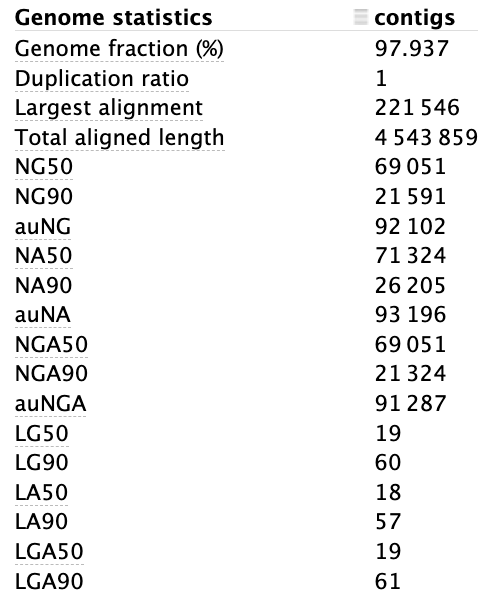

In [23]:
statistics = "quastOutput/reports/genome_statistics.png"
display.Image(statistics, width=200)

<ul>
<li>
<b>Genome Fraction (97.937%)</b>: Indicates that near 98% of the reference genome covered by the assembly.
</li>
<li>
<b>longest alignment (221,546)</b>: Indicates that the longest alignment has the length 221,546 bp.
</li>
<li>
<b>Total aligned length: (4,543,859)</b>: Indicates that total number of aligned bases is 4,543,859.
</li>


<li>
<b>Duplication ratio</b>: The total number of aligned bases in the assembly divided by the total number of aligned bases in the reference genome
</li>

</ul>

#### <span style="color: #98d9be">Misassemblies</span>

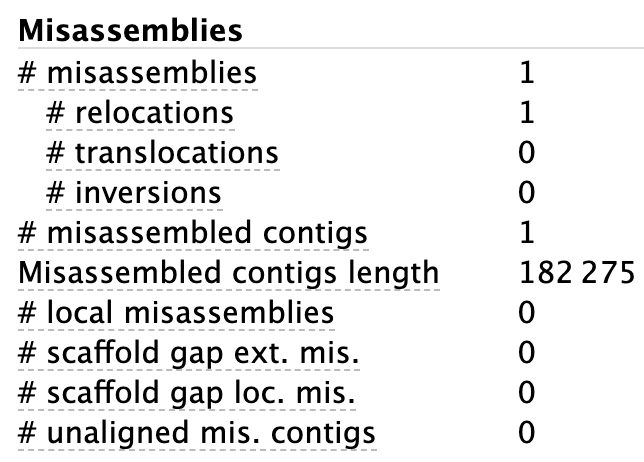

In [24]:
misassemblies = "quastOutput/reports/Misassemblies.png"
display.Image(misassemblies, width=200)

<ul>
<li>
<b>Misassemblies</b>: Describes the number and types of misassemblies, such as inversions, translocations, and relocations.
</li><br>
<li>
<b>Misassembled contigs</b>: It is the number of contigs that contain misassembly events. So, there is only 1 contig which has misassembly events in.
</li><br>
<li>
<b>Misassembled contigs length</b>: It is the number of total bases contained in all contigs that have one or more misassemblies. So, there are 182,275 bases with misassemblies.
</li><br>
</ul>

#### <span style="color: #98d9be">Unaligend</span>

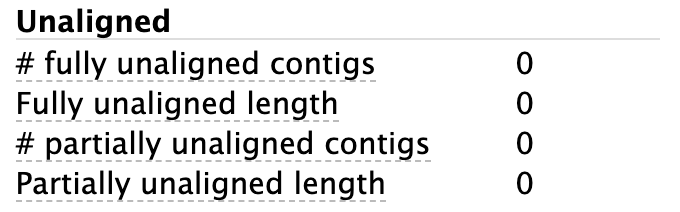

In [25]:
unaligned = "quastOutput/reports/unaligned.png"
display.Image(unaligned, width=200)

as it is obvious from the above chart, ther is no contig which is fully or partially unaligned.

#### <span style="color: #98d9be">Mismatches</span>

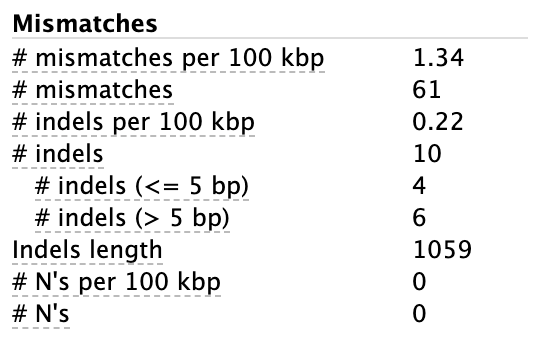

In [26]:
mismatches = "quastOutput/reports/mismatches.png"
display.Image(mismatches, width=200)

As it is conclued from the above chart, in each 100 kbp there is only 1.34 mismatches. Also, the total number of mismatches is 61 and there is no N (ambiguous base).

#### <span style="color: #98d9be">Statistics without reference</span>

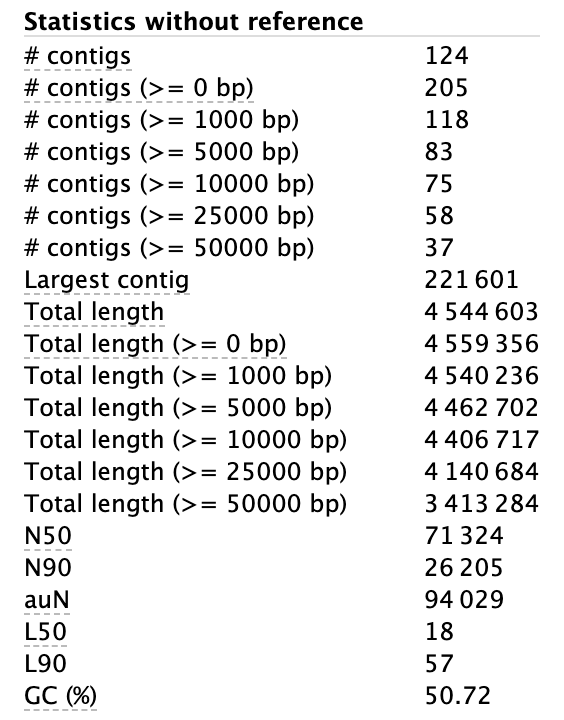

In [27]:
statistics_without_ref = "quastOutput/reports/Statistics without reference.png"
display.Image(statistics_without_ref, width=200)

From the above chart we conclude that there are 124 contigs which have more than 500 bp length. Also, as the contig length increases, the number of contigns with that min length decreases whivh is trivial.

The largest contig is about 221,601 bp and the total contigs length is 4,544,603 bp which is greater than total aligened length trivially!

<b>N50</b>: The length for which the collection of all contigs of that length or longer covers at least half an assembly. So, 71,324 bp is the min length in which all equal or longer contigs cover at least 50% of the assembly.

<b>NG50</b>: is the length for which the collection of all contigs of that length or longer covers at least half the reference genome. This metric is computed only if the reference genome is provided.

<b>GC</b>: The total number of G and C nucleotides in the assembly, divided by the total length of the assembly. Thus, GC = 50.72% means that near 51% of the assembly length contains G and C.


### <span style="color: #98d9be">Plots</span>

#### <span style="color: #98d9be"> Cumulative Length plot</span>

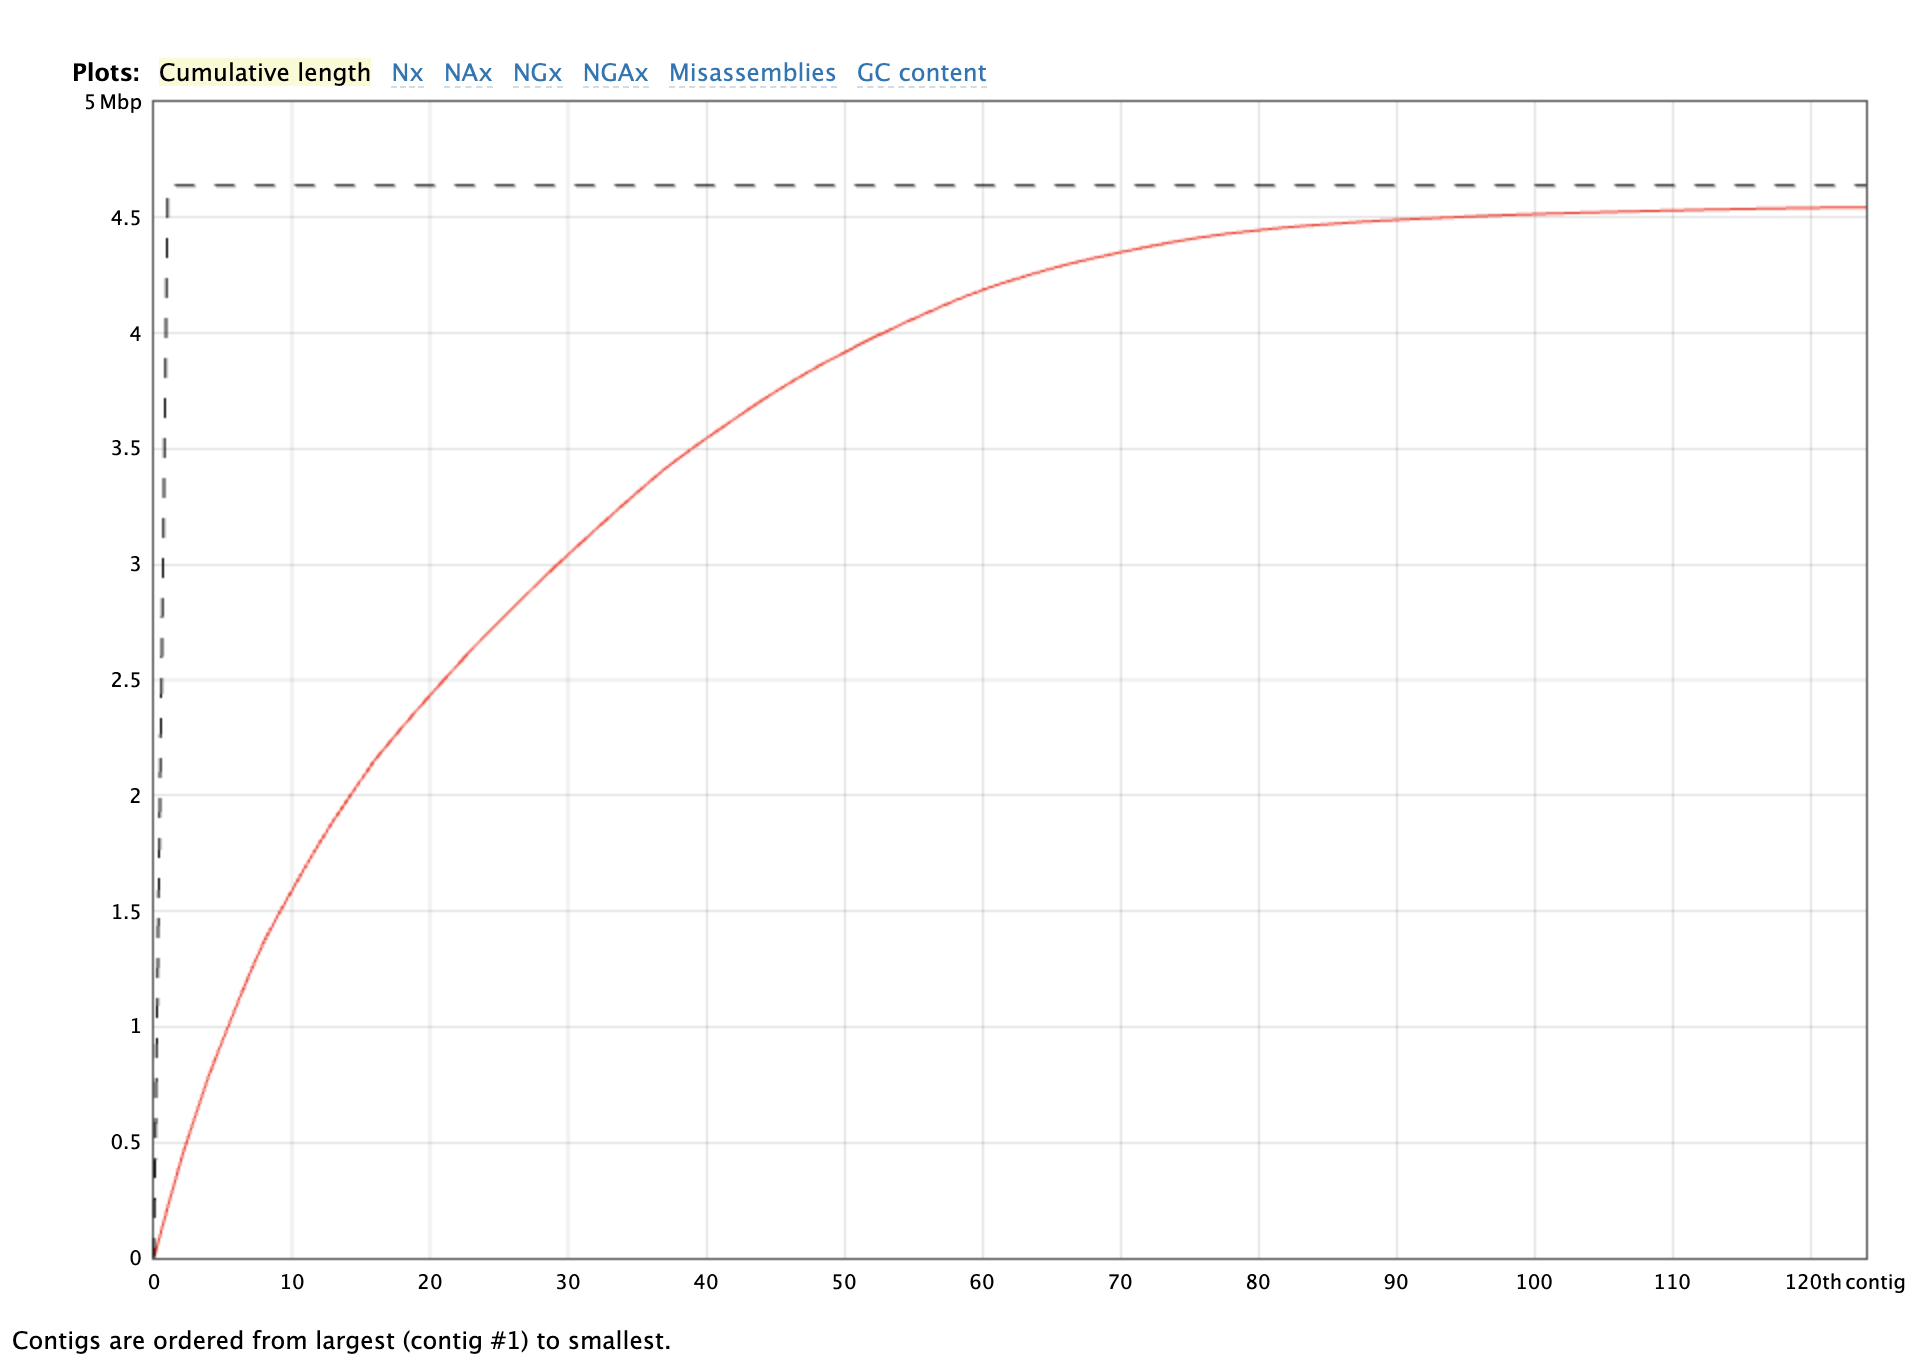

In [28]:
cumulative_length = "quastOutput/reports/Cumulative_length.png"
display.Image(cumulative_length, width=400)

Cumulative length plot shows the growth of lengths of aligned blocks(contigs). If a contig has a misassembly event, QUAST breaks it into smaller pieces called aligned blocks. On the x-axis, blocks are ordered from the largest to smallest. The y-axis gives the size of the x largest aligned blocks. So, as x grows, the slope decreases which means that the size of the largest aligned blockes grows slower.

#### <span style="color: #98d9be">Nx</span>

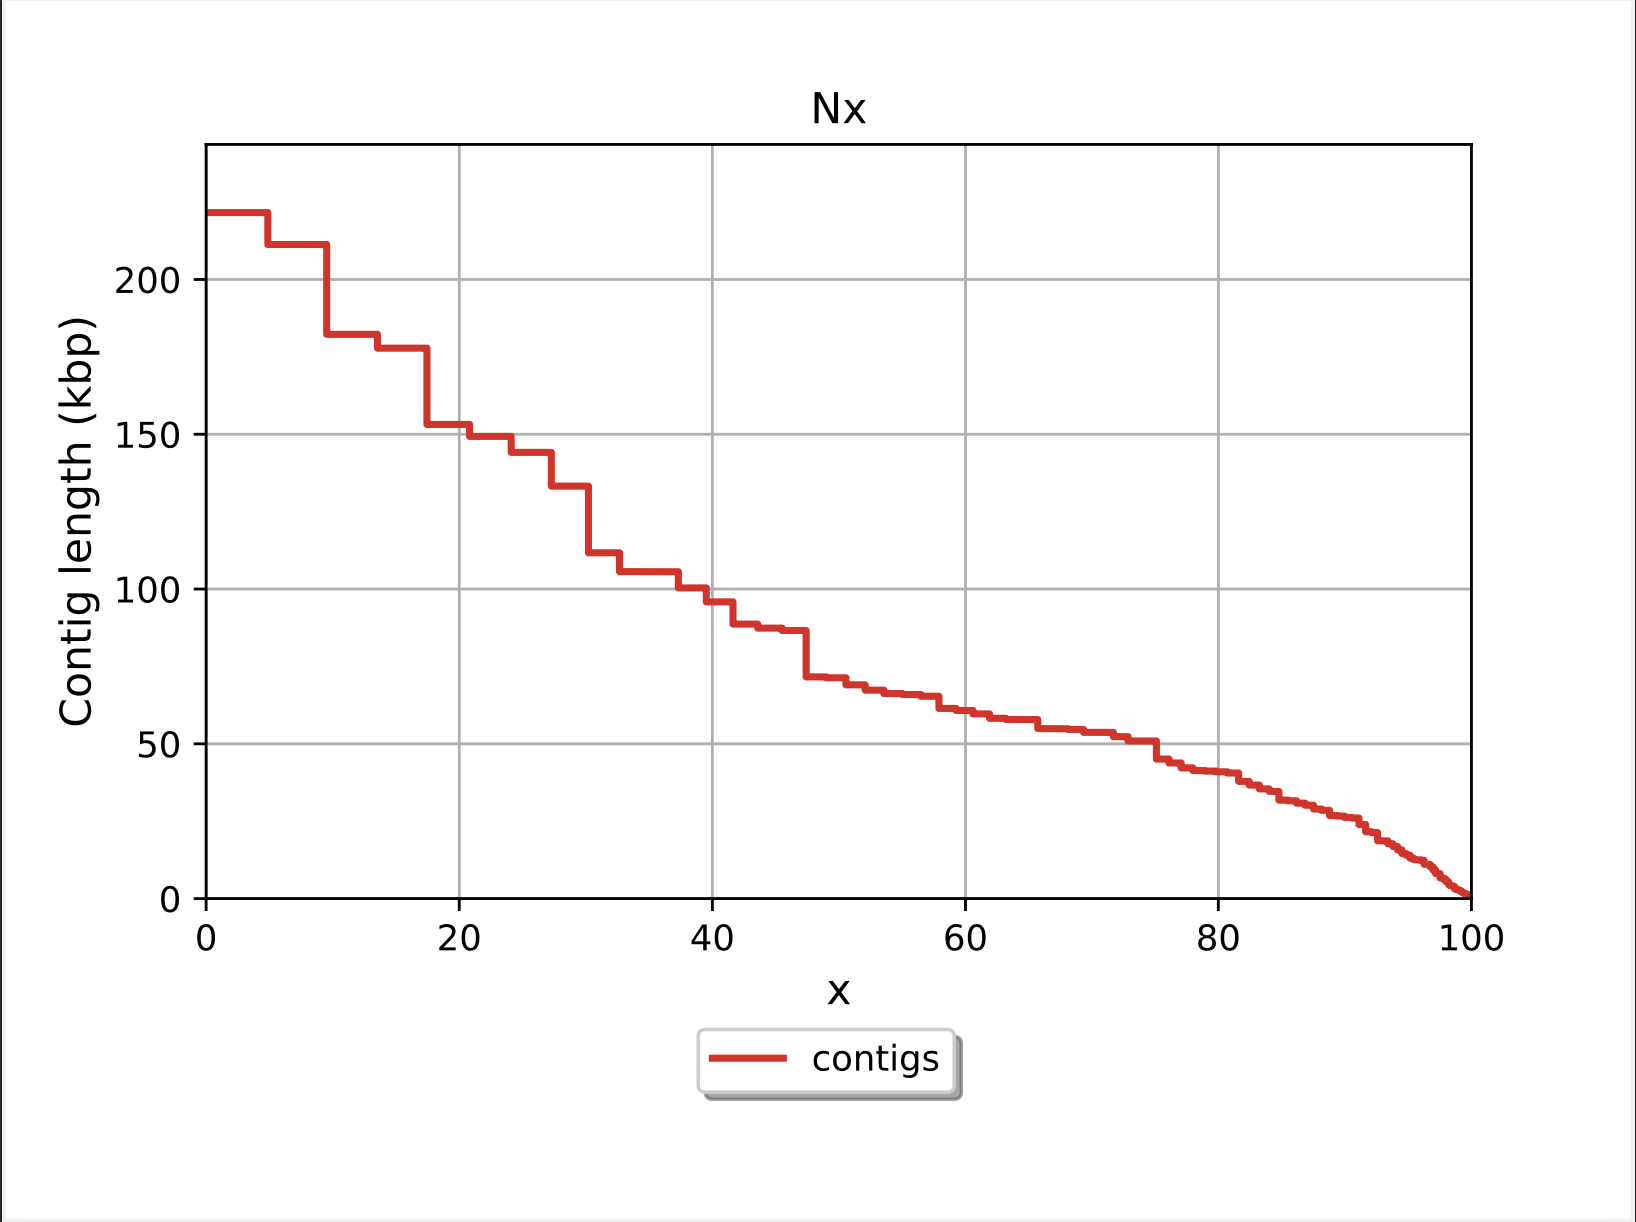

In [29]:
Nx = "quastOutput/reports/Nx.png"
display.Image(Nx, width=400)

Nx plot shows Nx values as x varies from 0 to 100 %. the above plot shows that longer contigns cover lower percentage of the assembly and for shorter contigs which have lengths near 0, almost all of the assembly is covered.

#### <span style="color: #98d9be">NGx</span>

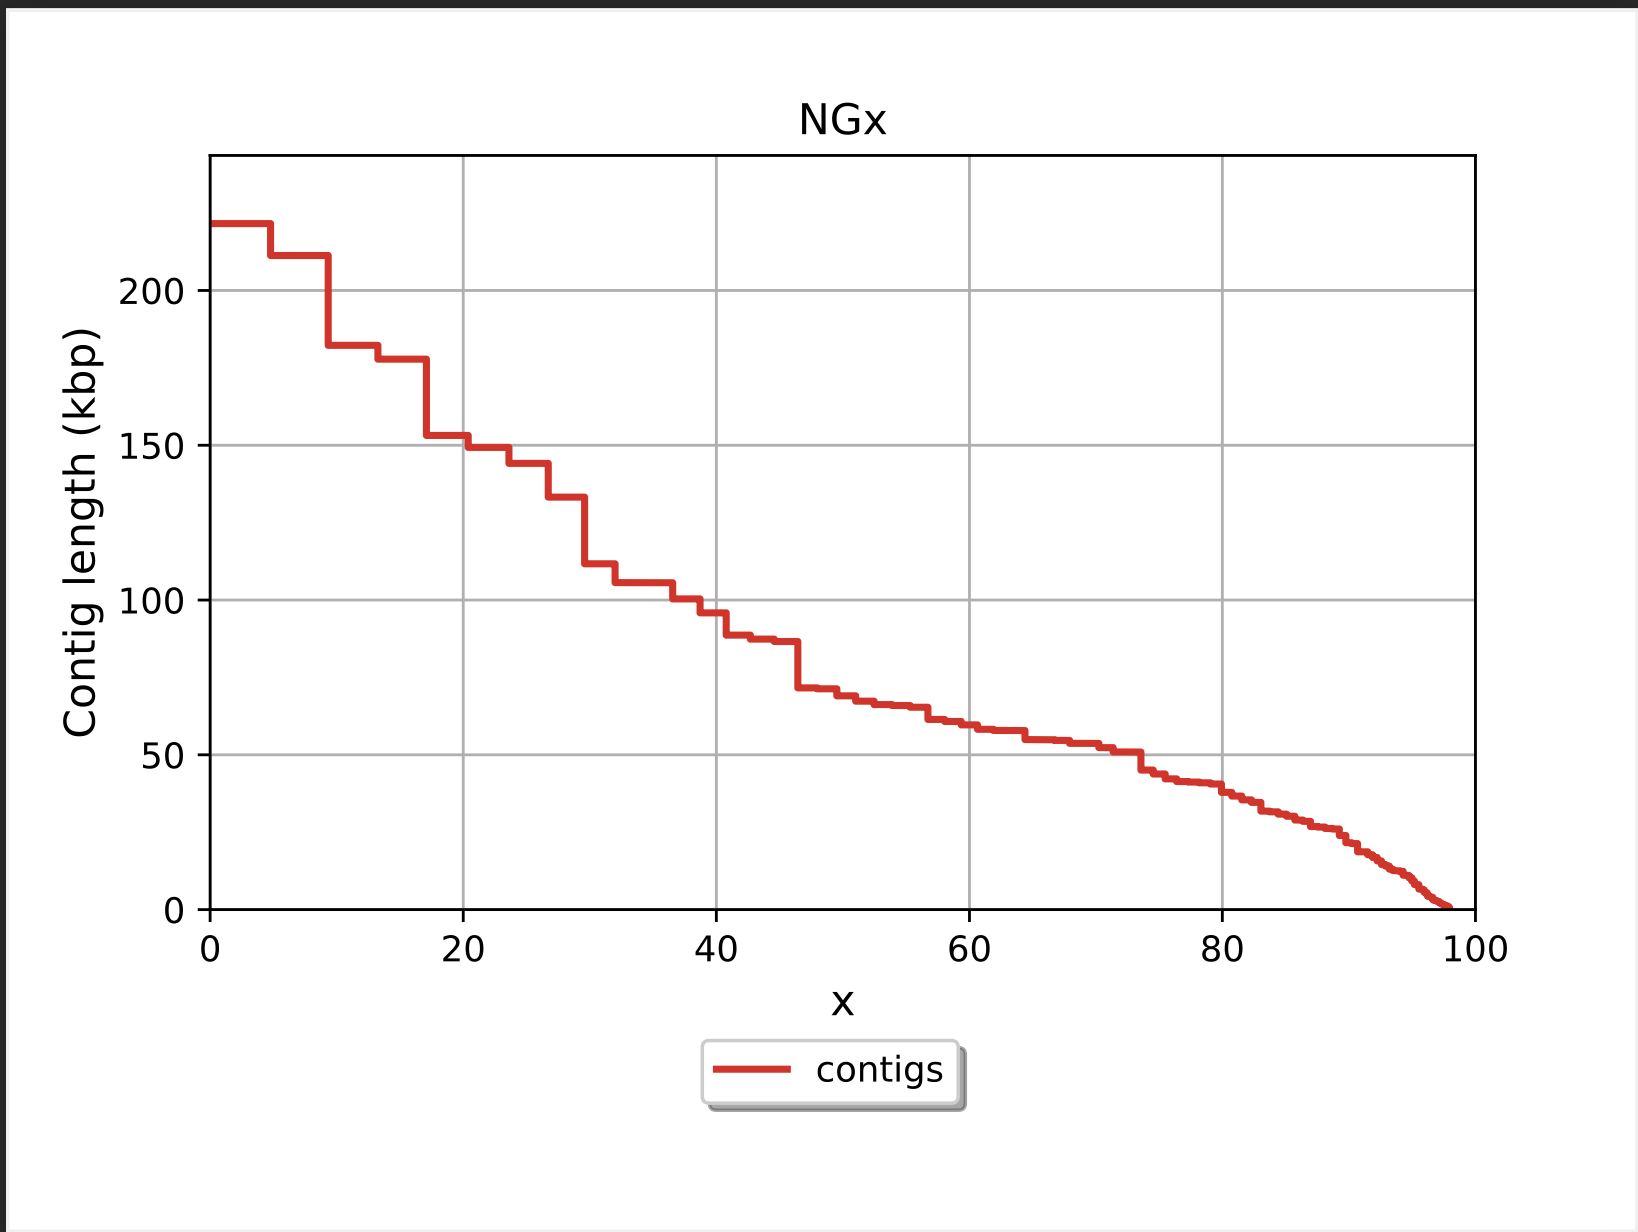

In [30]:
NGx = "quastOutput/reports/NGx.png"
display.Image(NGx, width=400)

#### <span style="color: #98d9be">NAx</span>

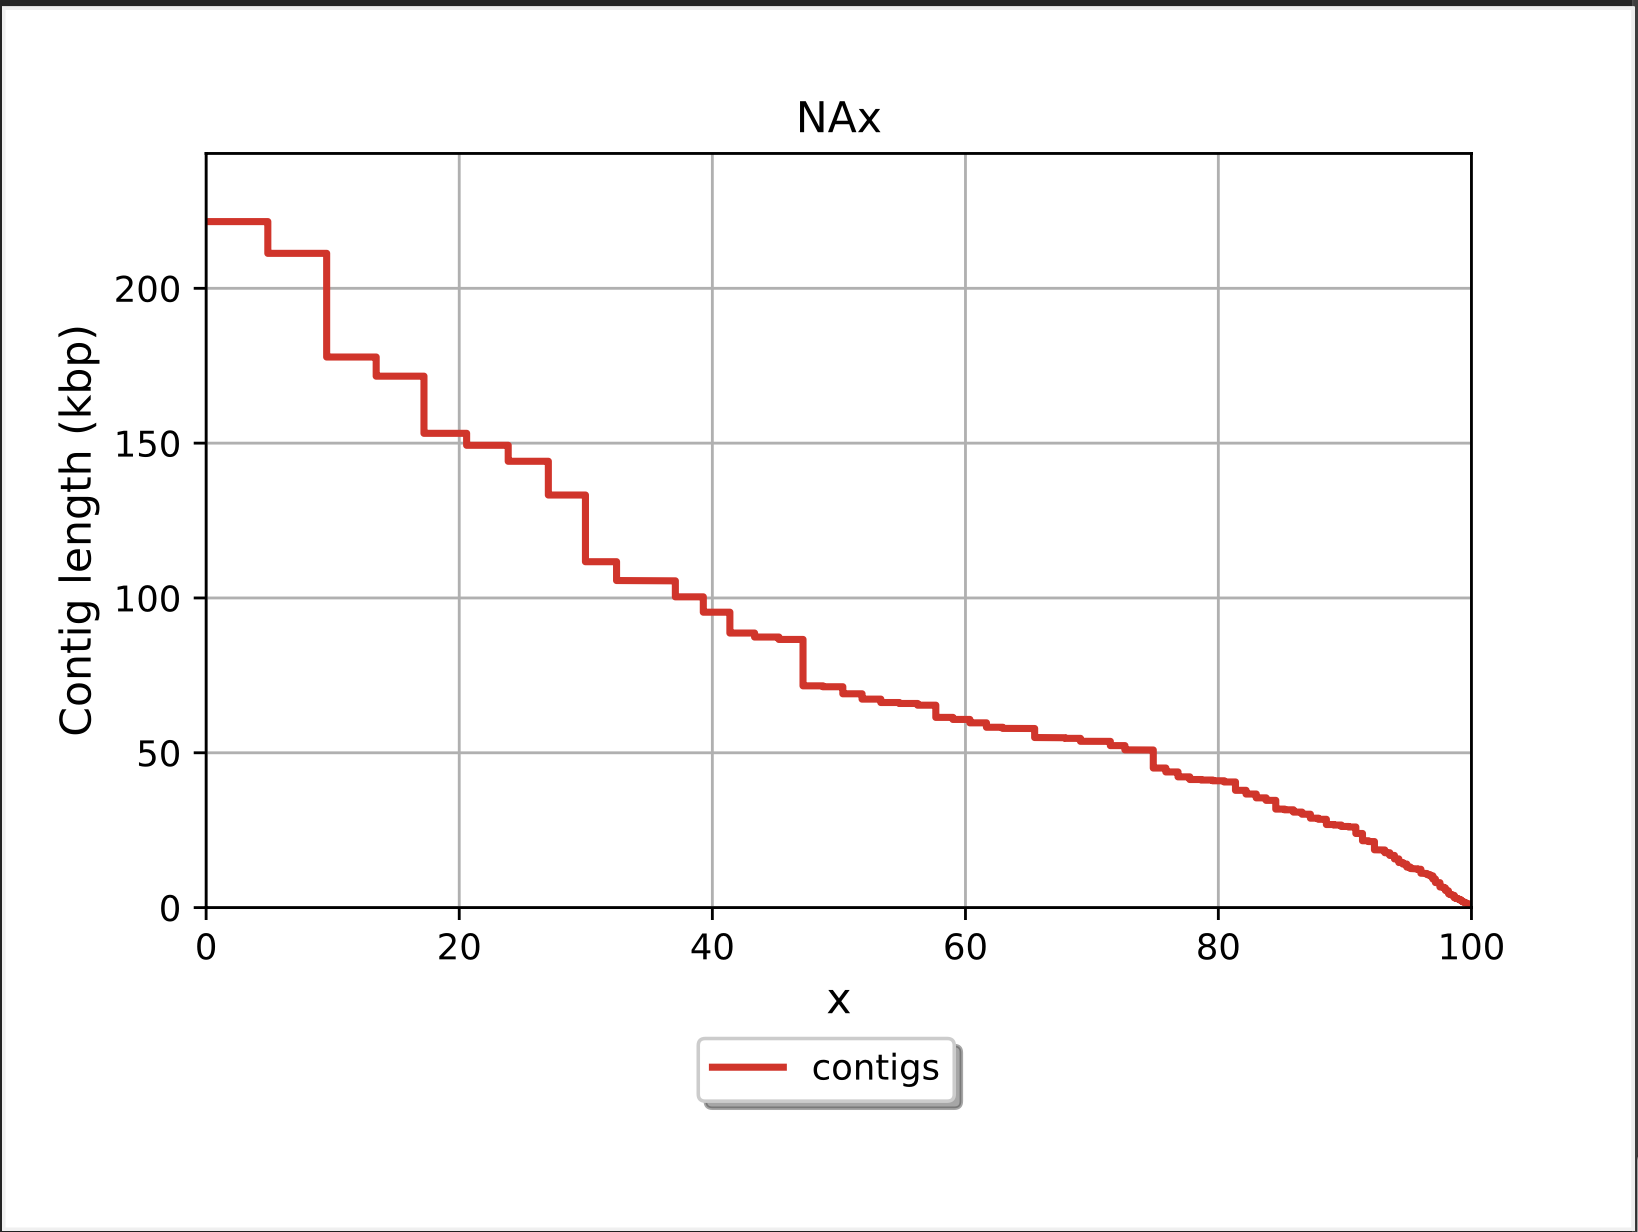

In [31]:
NAx = "quastOutput/reports/NAx.png"
display.Image(NAx, width=400)

#### <span style="color: #98d9be">NGAx</span>

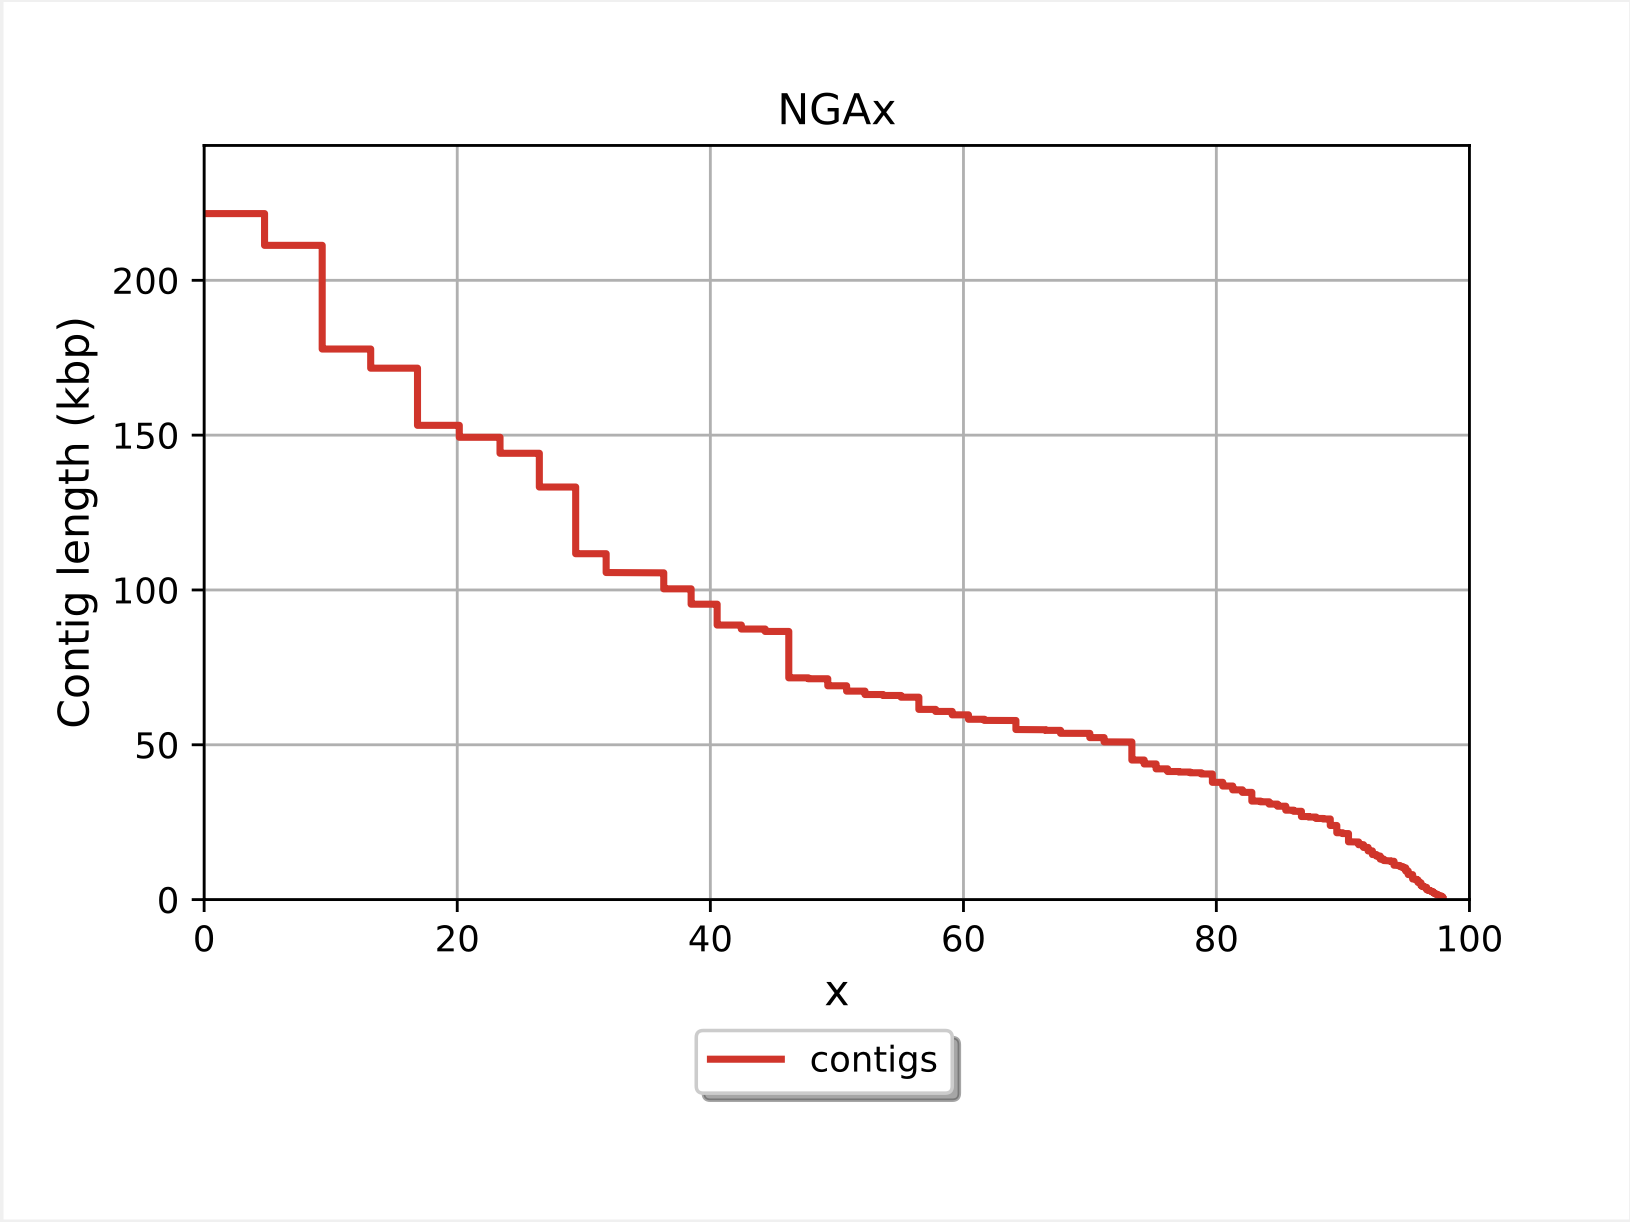

In [32]:
NGAx = "quastOutput/reports/NGAx.png"
display.Image(NGAx, width=400)

NAx and NGAx plots are similar to the Nx and NGx plots but for the NAx and NGAx metrics respectively. These plots are created only if a reference genome is provided.

#### <span style="color: #98d9be">Misassemblies</span>

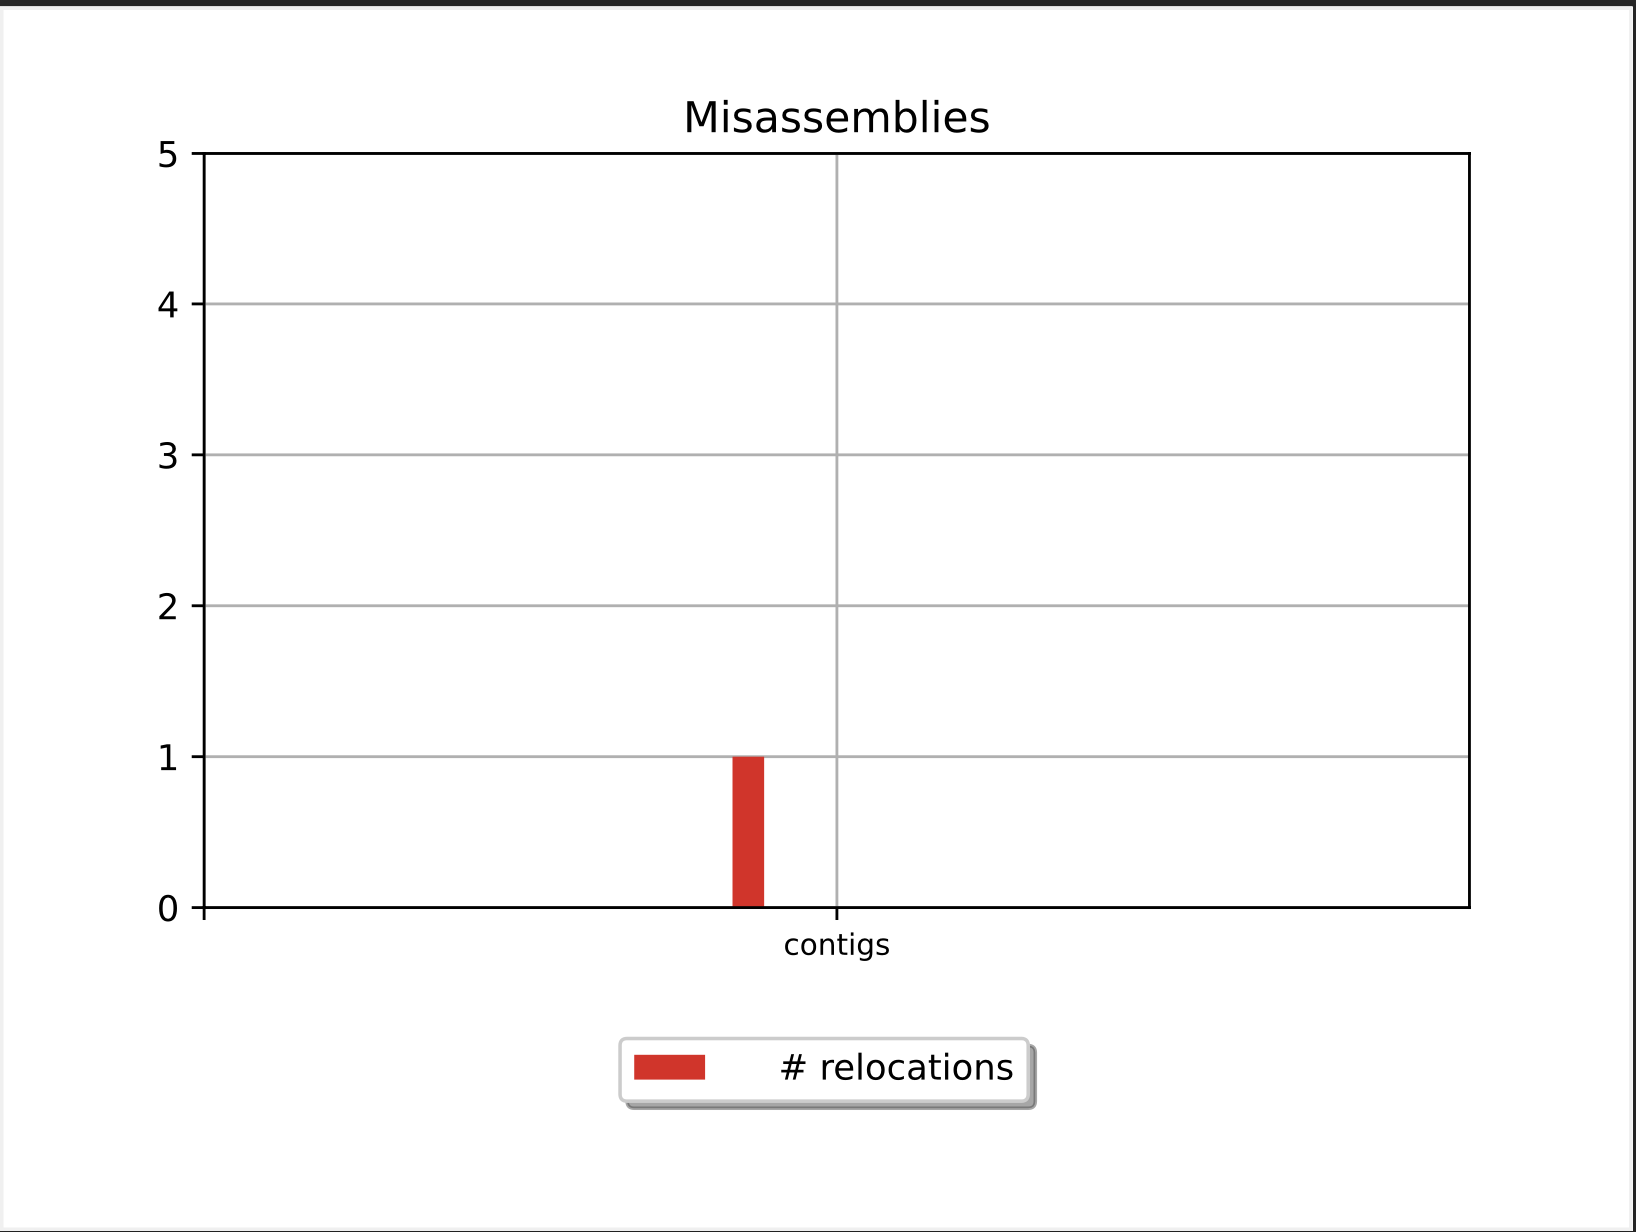

In [33]:
misassemblies_plot = "quastOutput/reports/misassemblies_plot.png"
display.Image(misassemblies_plot, width=400)

As we decribed in the missassemblies report, only 1 missassembly is occured.

#### <span style="color: #98d9be">GC content</span>

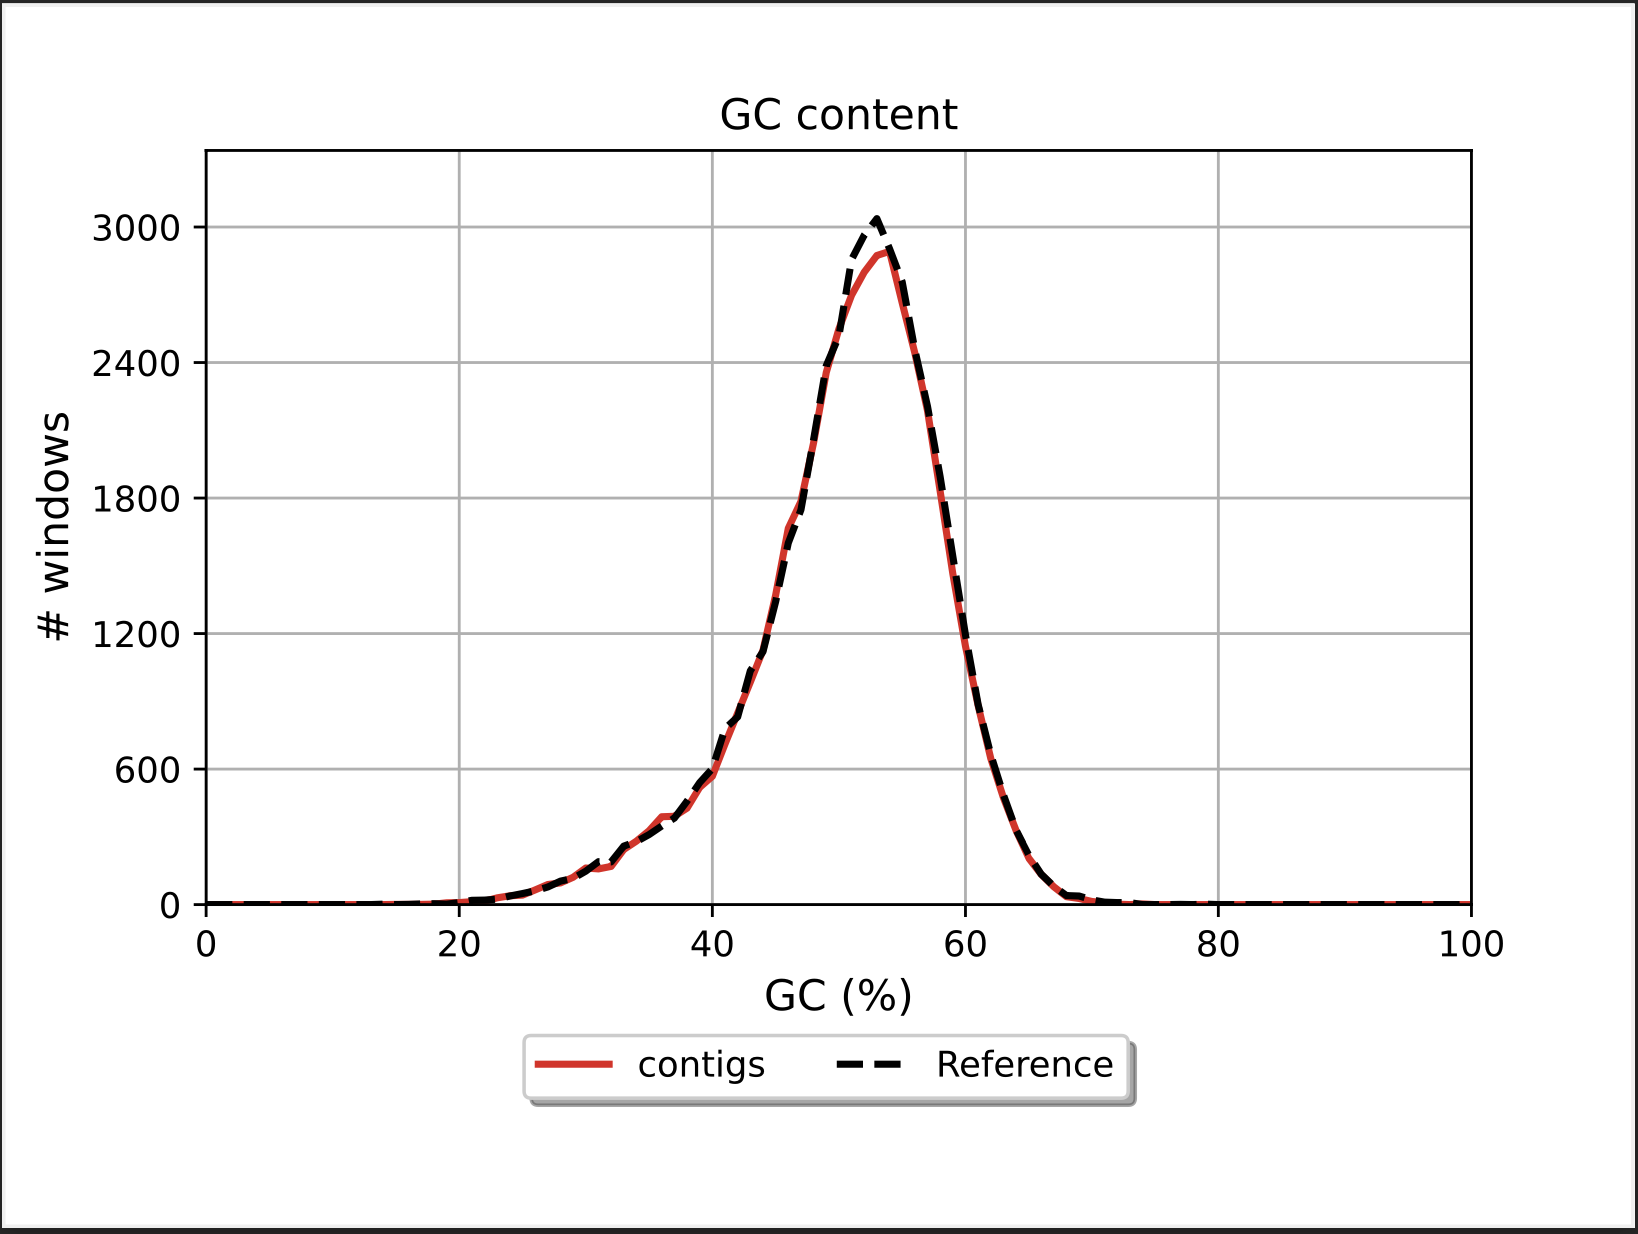

In [34]:
GC_content = "quastOutput/reports/GC_content.png"
display.Image(GC_content, width=400)

GC content plot shows the distribution of GC content in the contigs.
 
The x value is the GC percentage (0 to 100 %).
The y value is the number of non-overlapping 100 bp windows which GC content equals x %.
 
For a single genome, the distribution is typically Gaussian.

As it is obvious from the above plot, contigs' GC content is close to reference genome. So the assembly is done properly.

## Part C -  Read mapping

### <span style="color: #4287f5">1. Map the Illumina short-read data to the reference genome using BWA.</span>

To do this, I ran the below commands in the terminal and the results are as the following:

In [35]:
! bwa index ./referenceGenome/sequence.fasta
! bwa mem ./referenceGenome/sequence.fasta ./data/SRR8185316.fastq > ./alignmentResults/bwaOutput.sam

[bwa_index] Pack FASTA... 0.04 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 1.18 seconds elapse.
[bwa_index] Update BWT... 0.03 sec
[bwa_index] Pack forward-only FASTA... 0.03 sec
[bwa_index] Construct SA from BWT and Occ... 

0.58 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index ./referenceGenome/sequence.fasta
[main] Real time: 1.886 sec; CPU: 1.868 sec
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 100000 sequences (10000000 bp)...
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_process_seqs] Processed 100000 reads in 3.371 CPU sec, 3.338 real sec
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_process_seqs] Processed 100000 reads in 3.636 CPU sec, 3.430 real sec
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_process_seqs] Processed 100000 reads in 3.471 CPU sec, 3.275 real sec
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_process_seqs] Processed 100000 reads in 3.488 CPU sec, 3.242 real sec
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_process_seqs] Processed 100000 reads in 3.572 CPU sec, 3.368 real sec
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_process_seqs] Processed 100000 reads in 3.402 CPU sec,

The fisrt command indexes the reference genome, specified as ```sequence.fasta```, to create an index that BWA can use for more efficient alignment. Indexing is a preprocessing step that helps speed up the alignment process.


The second command uses the <b>BWA mem algorithm</b> to align the reads from the FASTQ file (```SRR8185316.fastq```) to the indexed reference genome (```sequence.fasta```). The alignment results are then redirected to a SAM (Sequence Alignment/Map) file named ```bwaOutput.sam``` which is a standard format for representing sequence alignments.


Thus, these two commands are part of the process of aligning DNA sequencing reads from the specified FASTQ file to a reference genome using BWA. The resulting SAM file can be further processed, converted to BAM (binary version of SAM).

### <span style="color: #4287f5"> 2. Print the head of the obtained SAM file from previous part.</span>

The below command will display the first 10 lines of the SAM file, providing an overview of the file's structure. Each line in a SAM file represents an alignment or header information.

<b>Header lines</b>: Lines starting with '@' provide metadata and information about the reference genome, read groups, etc.

<b>Alignment lines</b>: Lines without '@' represent individual read alignments. Each field is tab-separated, and the first few fields include information such as read name, flags, reference name, position, mapping quality, etc.

Here is a breif of what are the parameters:

<ul  style="list-style-type: none">
    <li>@SQ:<li>
    <ul>
    <li>SN(Sequence Name): This field indicates the name of the reference sequence (chromosome or contig).</li>
    <li>LN(Sequence Length): Specifies the length of the reference sequence in base pairs.</li>
    </ul>
     <li>@PG:<li>
    <ul>
    <li>ID(Program Group Identifier): This field uniquely identifies the program group. It is a required field.</li>
    <li>PN(Program Name): Specifies the name of the program that produced the alignment data.</li>
    <li>VN(Program Version): Indicates the version of the program used.</li>
    <li>CL(Command Line): Represents the command line used to run the program.</li>
    </ul>
</ul>

In [36]:
print("The firt 10 lines of the sam file:\n")
! head -n 10 ./alignmentResults/bwaOutput.sam

The firt 10 lines of the sam file:

@SQ	SN:U00096.2	LN:4639675
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem ./referenceGenome/sequence.fasta ./data/SRR8185316.fastq
SRR8185316.1	0	U00096.2	3783615	60	100M	*	0	0	AGCGGTACACATTATGGGTCTGCTCTCCGCAGGCGGCGTACACAGCCACGAAGATCACATCATGGCGATGGTAGAACTGGCAGCTGAACGCGGCGCAGAA	IIGIIIIIIIIIIIIHIIIIIIIIIIIIIIIII@IHHEHIIIIIIIIIIIHIIHIIIIIIIIGIHIIHFIIEIIGIHHGH@BE3BB>@>>2?@8?>?A@1	NM:i:0	MD:Z:100	AS:i:100	XS:i:0
SRR8185316.2	0	U00096.2	1394282	0	100M	*	0	0	TAATGGCCGGCGACCTTATCCGCTGGAAACCATGCTACGCATTCACTGCATGCAGCATTGGTACAACCTGAGCGATGGCGCGATGGAAGATGCTCTGTAC	HHHHHHHHHHDHHDHHHGFGHDGGHG>GGGG<GDGHHEGH@EGGGHBHBHHHGHHFHHHHDEDFFHBHEFHHHH<FHDBH@HCBCG3DDB+?:=8DDBBD	NM:i:0	MD:Z:100	AS:i:100	XS:i:100
SRR8185316.3	16	U00096.2	3679372	60	100M	*	0	0	ATTTCAGCGGATCGGCAGGATGGGGACCTAACAAGGTTGACCCTTTCAGACGATAGCGCCGCCAGCCCTCTTTAGTATCGGCAGGCCAGGTTGCCACCAT	###########################################################?/;<?8=B<2A>A=A2CCACEGEDE@GEGBDDFH>HHDHH=	NM:i:4	MD:Z:0G20C1T36A39	

### <span style="color: #4287f5"> 3. Convert SAM to an indexed BAM and sort it:</span>

This command converts the SAM file (```bwaOutput.sam```) to a BAM file (```bwaOutput.bam```):

In [37]:
! samtools view -bS ./alignmentResults/bwaOutput.sam > ./alignmentResults/bamOutput.bam

Sort the BAM file:

This step sorts the BAM file (```bwaOutput.bam```) and saves the sorted output as a new BAM file (```sortedBamOutput.bam```).

In [38]:
! samtools sort ./alignmentResults/bamOutput.bam -o ./alignmentResults/sortedBamOutput.bam

Index the sorted BAM file:

This command indexes the sorted BAM file (```sortedBamOutput.bam```) to create a corresponding BAM index file (```sortedBamOutput.bam.bai```).

In [39]:
! samtools index ./alignmentResults/sortedBamOutput.bam

In this step, we have a sorted and indexed BAM file (```sortedBamOutput.bam```) along with its corresponding index file (```sortedBamOutput.bam.bai```) in our directory!


### <span style="color:#4287f5">4. IGV</span>

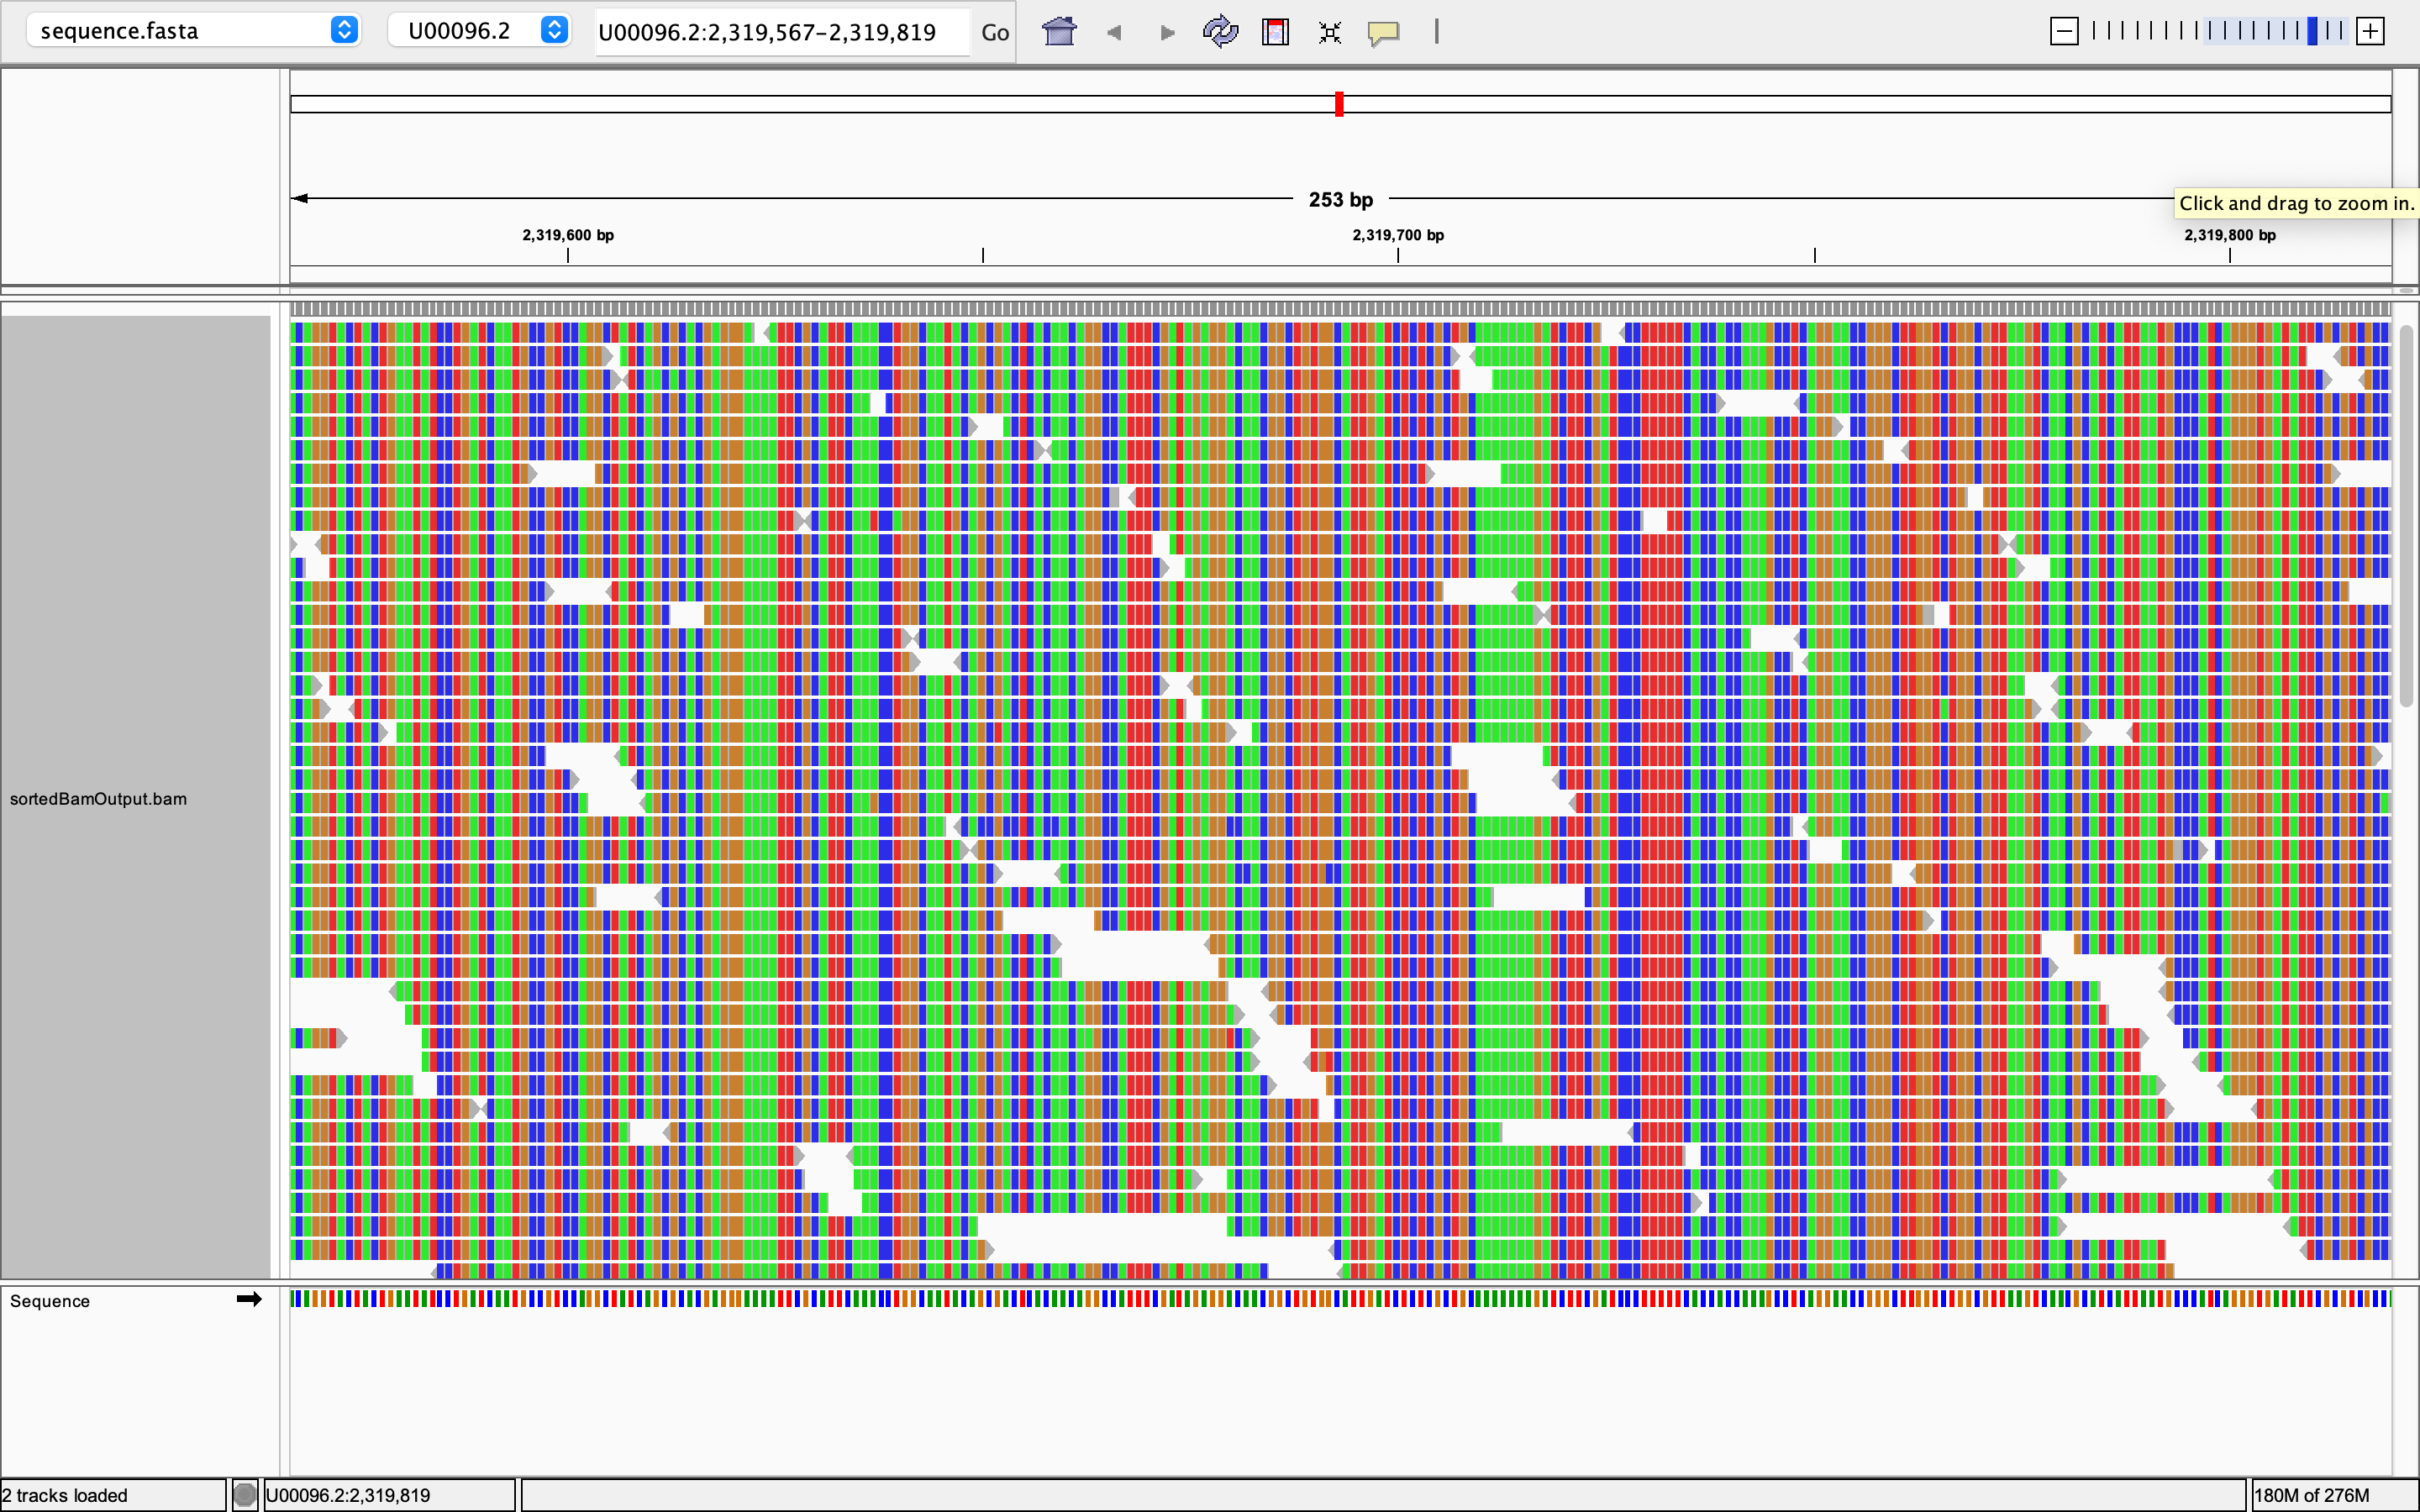

In [40]:
IGV_per_base = "IGV/per-base.png"
display.Image(IGV_per_base, width=500)

In the following map which is the igv result of the reference genome and the fasta file, an arbitrary section of the genome has been chosen. In this figure, bases are explicitly shown. Red,green, blue, and brown bases are T, A, C, and G nucleotides respectively.

The colored areas show the reads which are matched to the reference and the white spaces are the gaps between reads which are aligned.

Also, each track has an arrow head and a solid head. The  "arrow head" often refers to the visual representation of a sequencing read where the end of the read is indicated with an arrowhead. It points in the direction of the 3' end of the read. This is common in RNA-seq tracks, where arrows help indicate the transcriptional direction of the aligned reads. "Solid head" also is the start of the read. In fact, if the arrowhead is in the right, then the read is mapped to the forward strand(Flag: 0) and if it is in the left side, it is mapped to the reverse strand(Flag: 16).

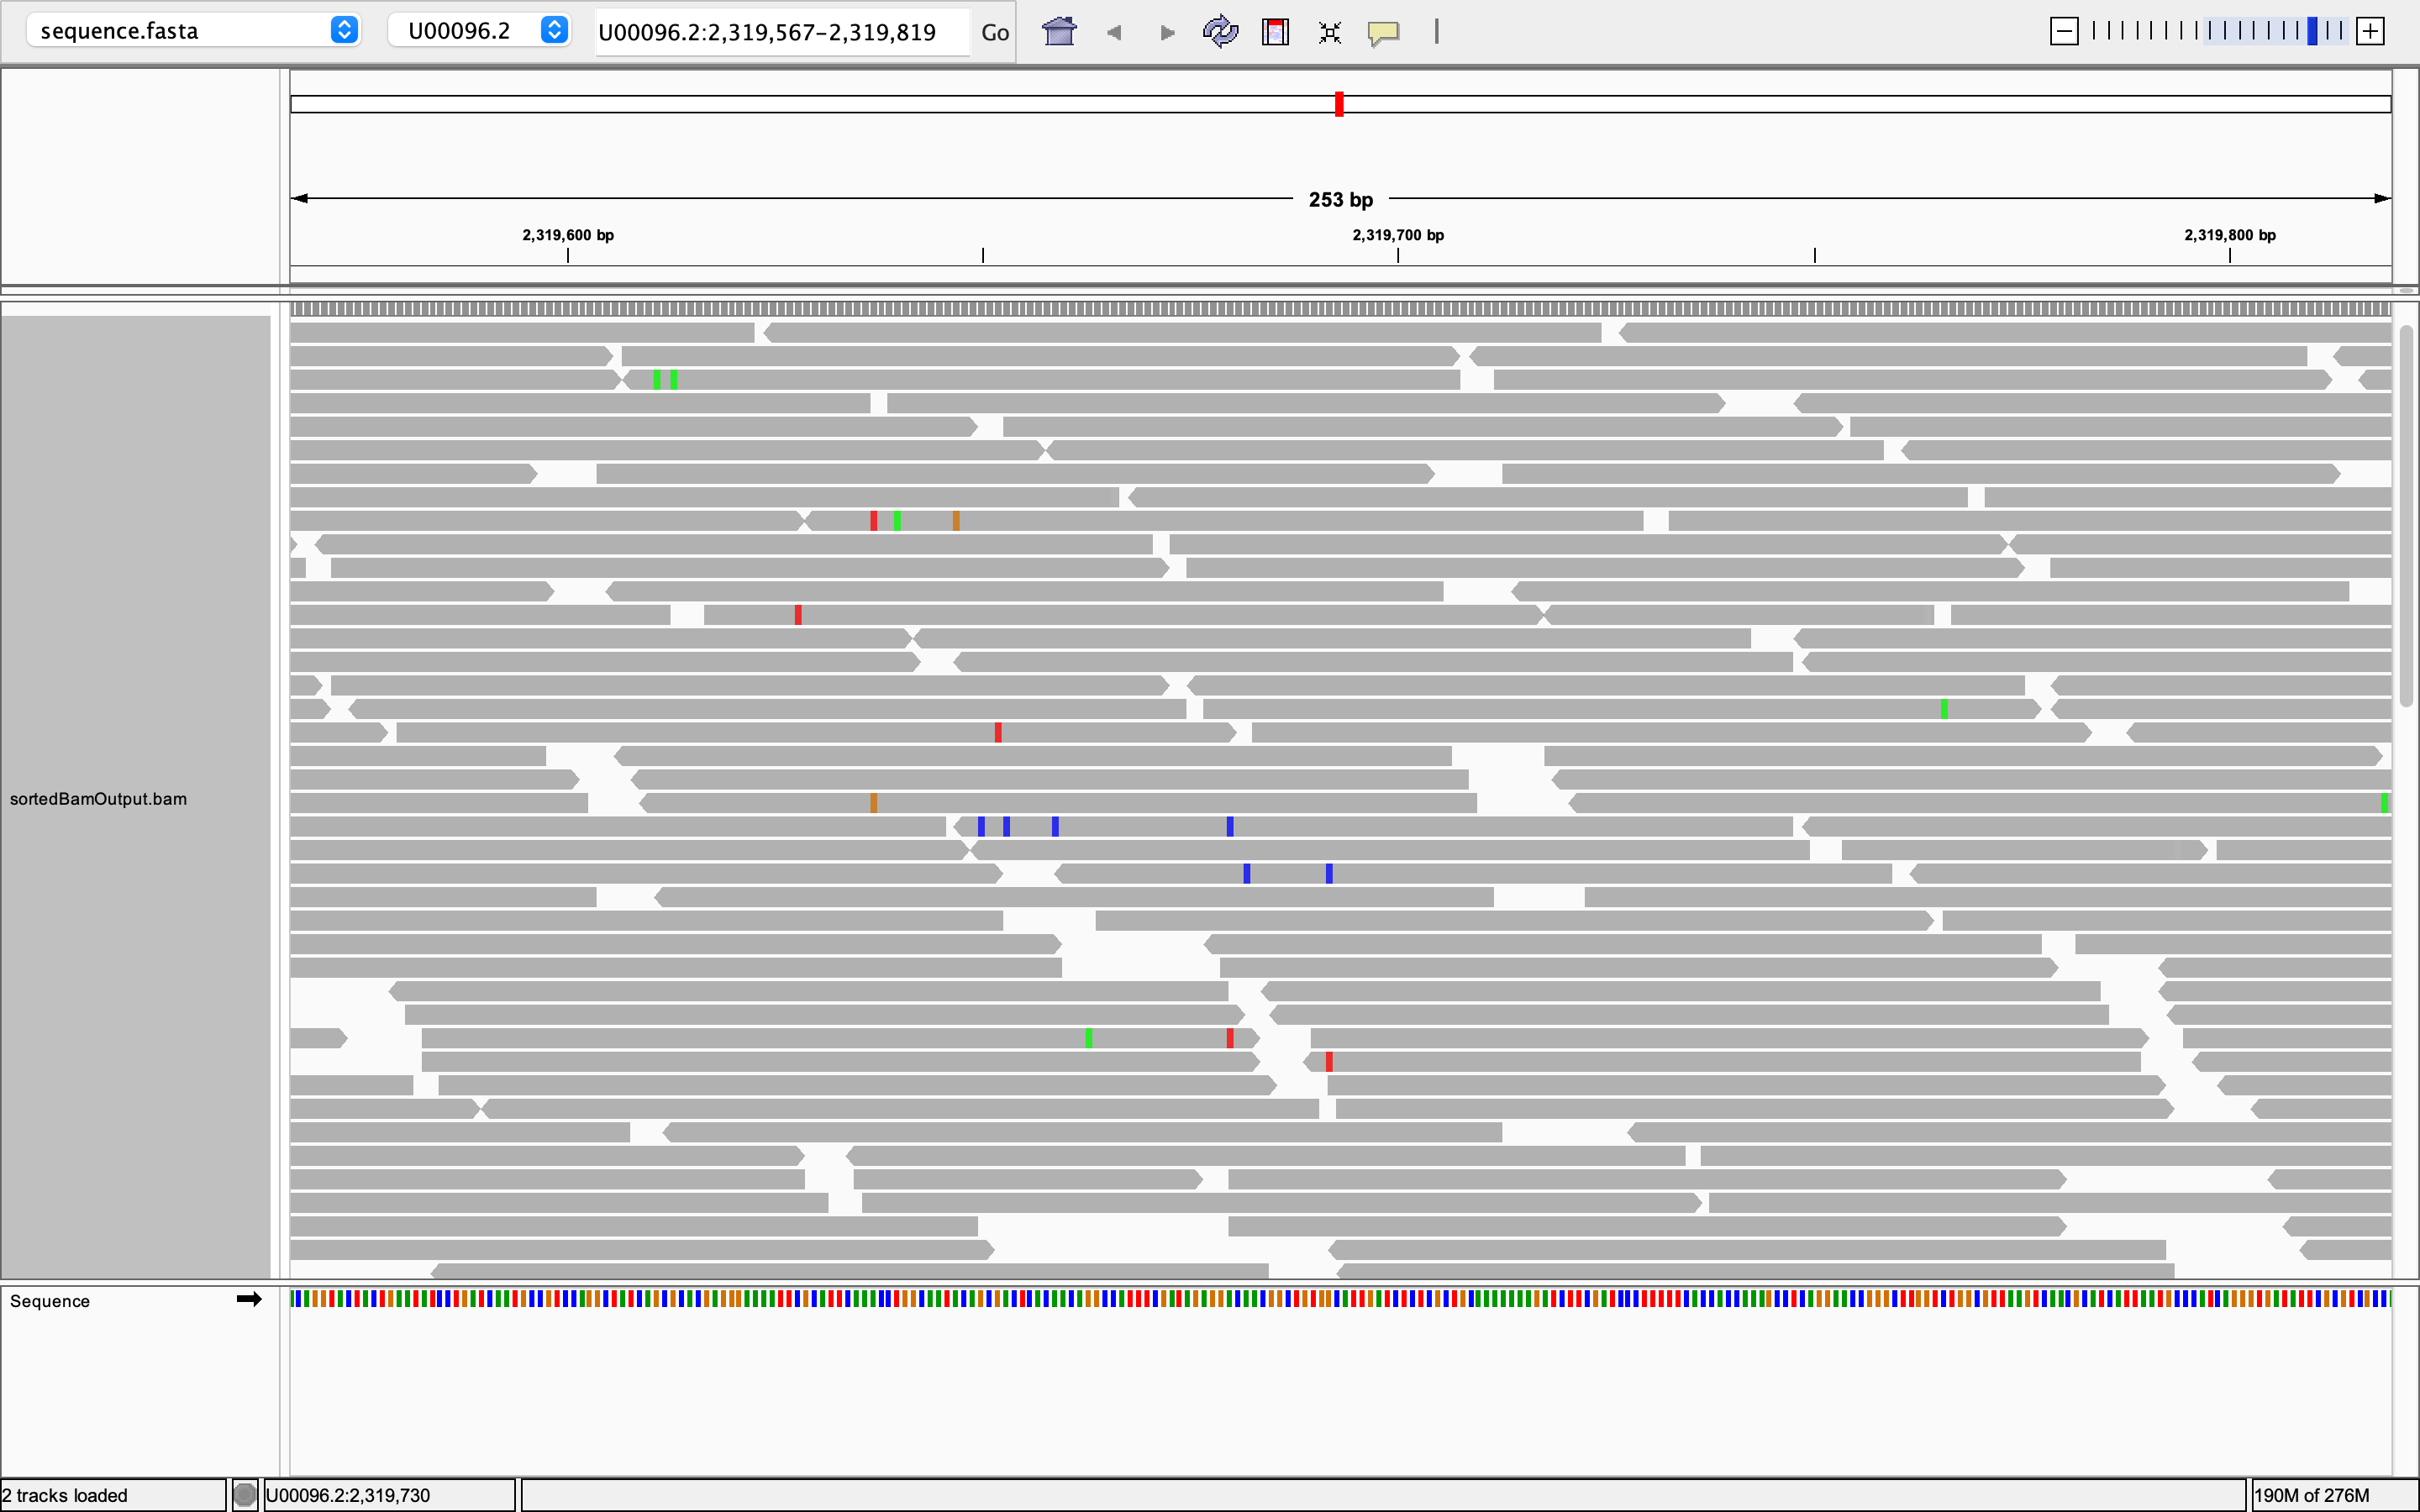

In [41]:
IGV_map = "IGV/200b_map.png"
display.Image(IGV_map, width=500)

The above map is the previous one except that bases are not indivisually shown here. Only mismatch bases are colored. As you can see in the above pictures, a good amount of reads are matched to the reference genome. In fact, based on the results we found sofar, reads cover the reference genome properly.

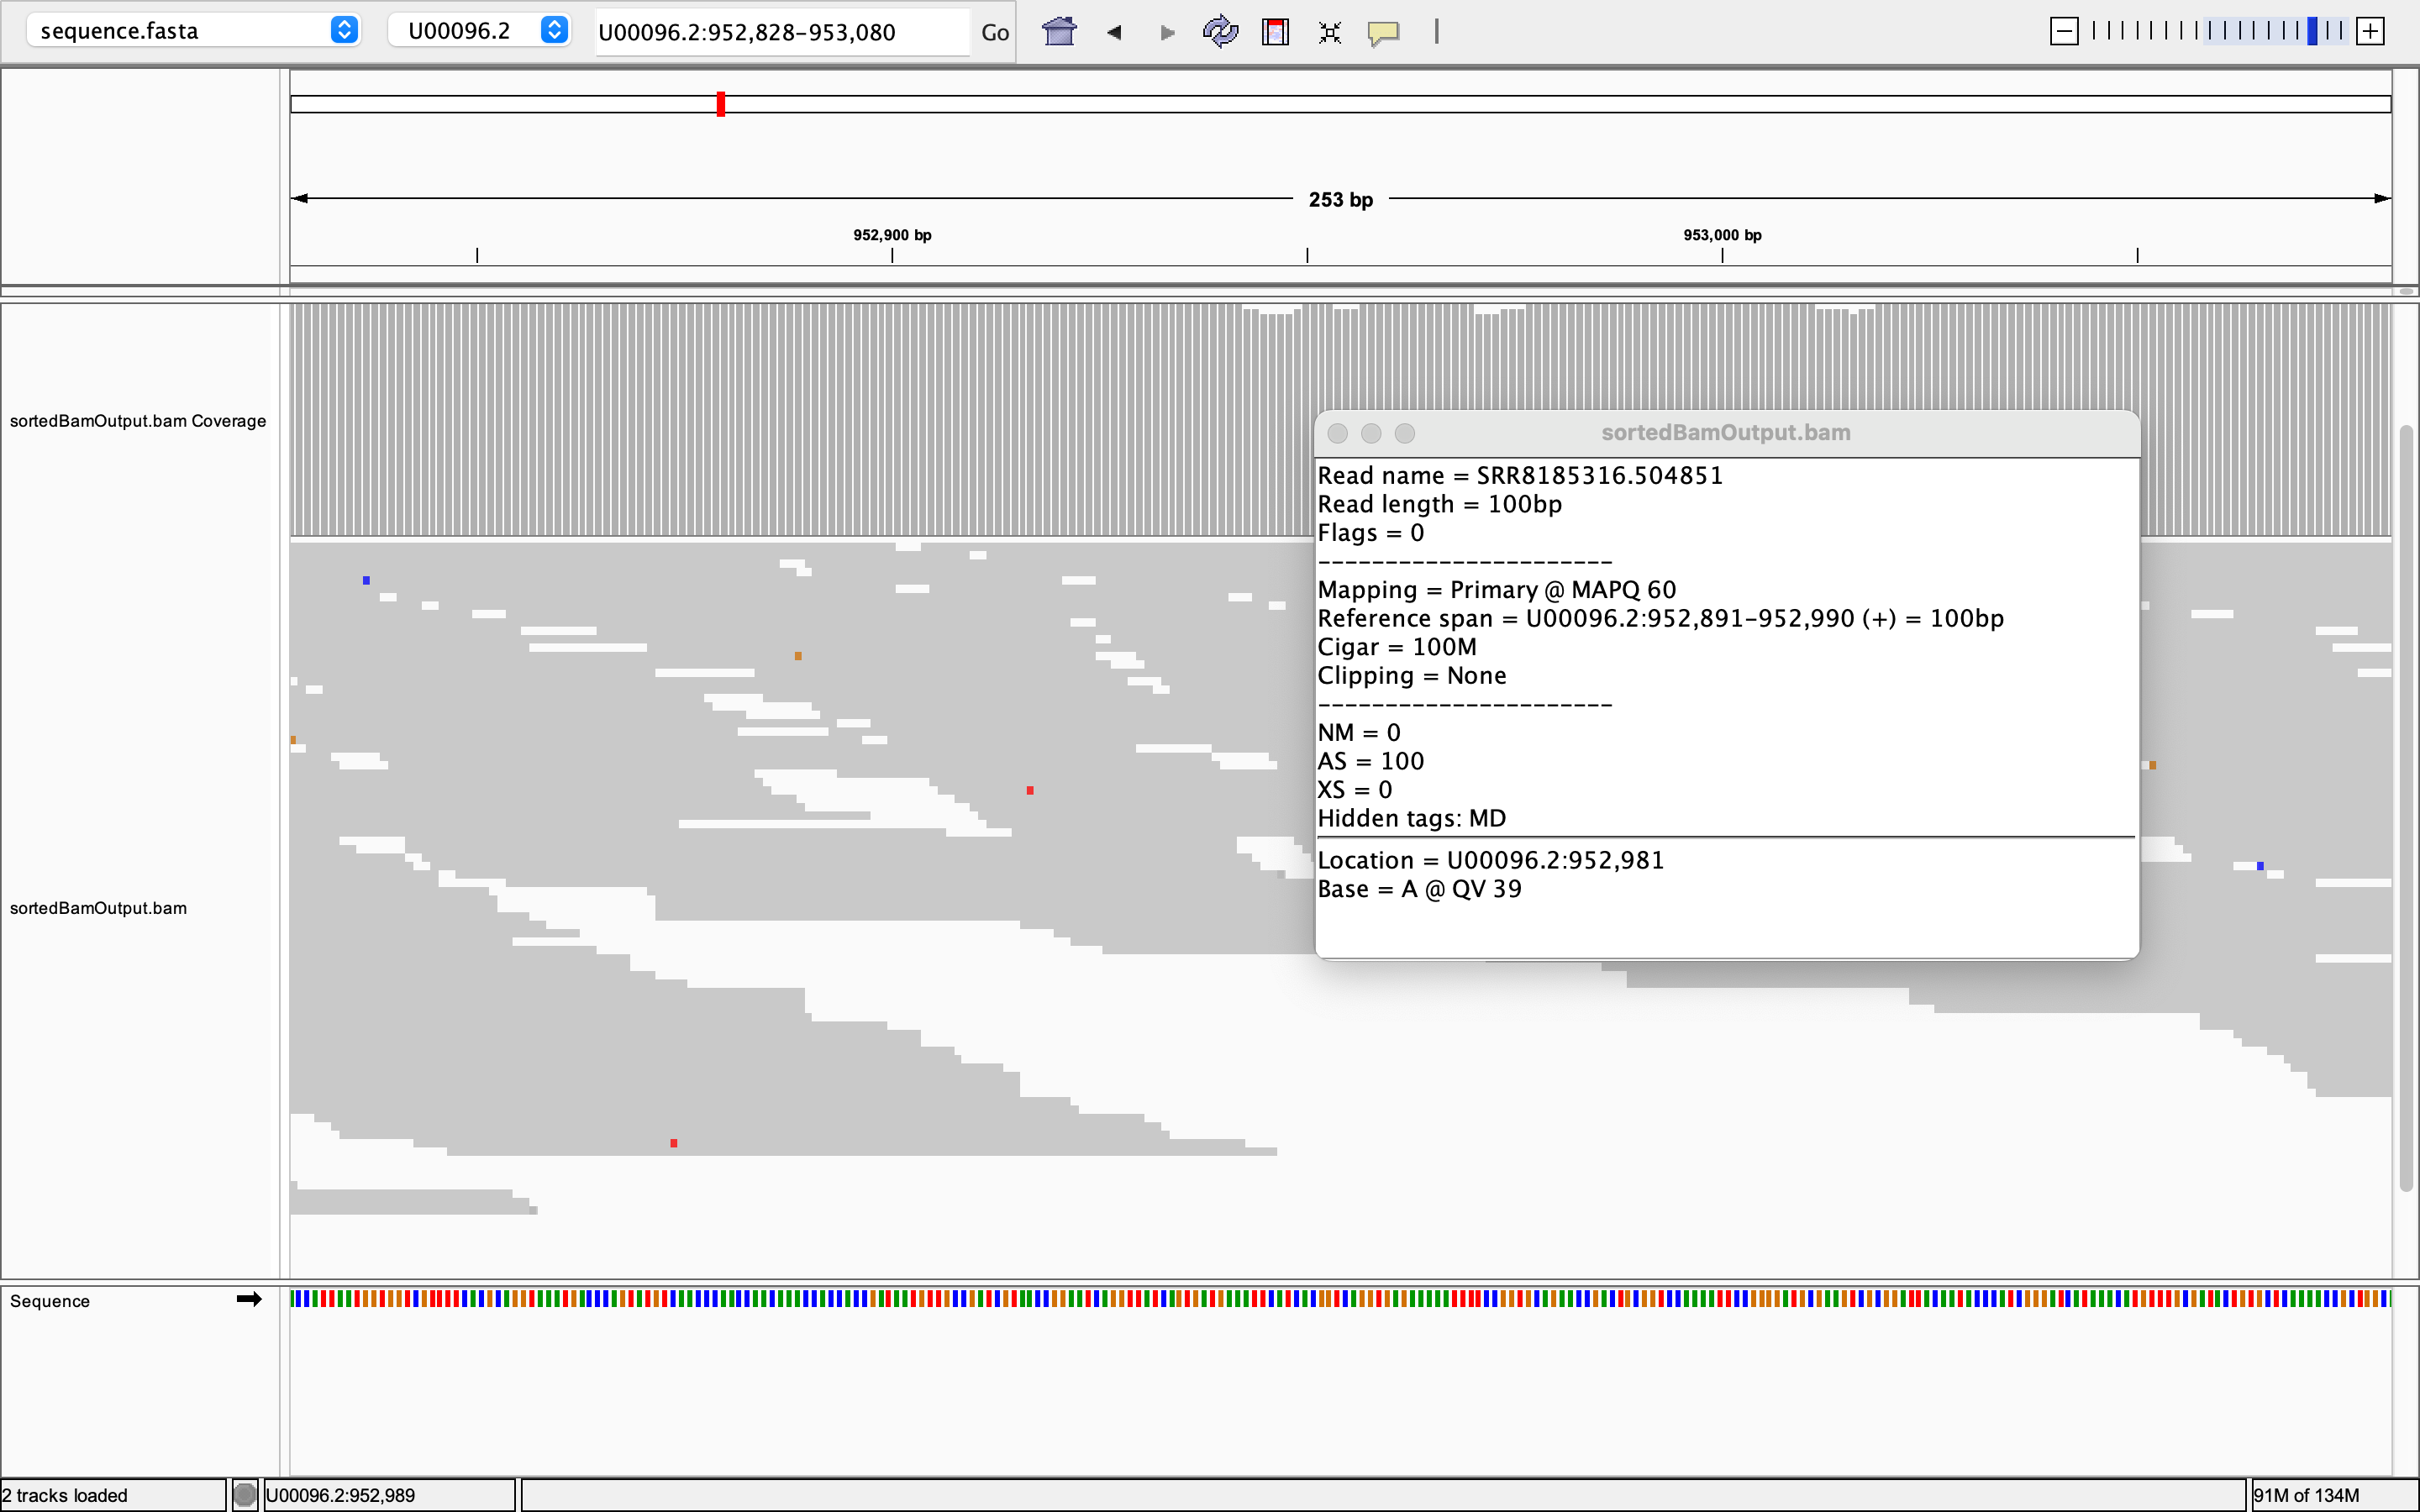

In [42]:
track = "IGV/track_data.png"
display.Image(track, width=500)

By clicking on each track, a window will appear as above. There is some useful information in it which I am going to interpret:<br><br>
<ul>
<li><b>Read Name</b>: As there are a lot of distinct reads, each of them has identical name and by clicking on different tracks, we get different read names.</li>
<li><b>Read Length</b>: As we know from before in this project, the length of all reads are near 100.</li>
<li><b>Flags</b>: parameter is Flags which is always 0 or 16.

Flag 0:

Binary Representation: 0000<br>
Meaning: No flags are set. This indicates that the read is mapped to the forward strand, and it is the primary alignment.

Flag 16:

Binary Representation: 10000<br>
Meaning: The read is mapped to the reverse strand. This flag is set to indicate that the read aligns to the reverse (complementary) strand of the reference genome.</li>
<hr>
<li><b>Mapping = Primary @ MAPQ 60</b>: 

Primary: This indicates that the read is considered the primary alignment, meaning it is the best alignment found by the alignment algorithm.

The MAPQ (Mapping Quality) values in the SAM/BAM format can range from 0 to 255. The higher the MAPQ, the higher the confidence in the accuracy of the alignment.
MAPQ 0:Mapping is not unique

MAPQ 1-10: Low confidence

MAPQ 11-20: Moderate confidence

MAPQ 21-30: Reasonably high confidence

MAPQ 31-60: High confidence

MAPQ 61-255: Highest confidence

MAPQ 60: The MAPQ is 60, indicating a high mapping quality. A MAPQ of 60 is the highest possible value and suggests high confidence in the accuracy of the alignment.</li>
<li><b>Reference span = U00096.2:952,891-952,990 (+) = 100bp</b>: 

U00096.2: This is the reference sequence or gene identifier.

952,891-952,990: The genomic coordinates where the read is aligned on the reference genome. In this case, it spans from position 952,891 to 952,990.

(+): Indicates that the read is aligned to the forward strand of the reference genome.

100bp: The span of the alignment is 100 base pairs.</li>
<li>
<b>Cigar = 100M</b>:

100M: The CIGAR string indicates the alignment details. In this case, it is "100M," which means the read aligns to the reference with a match over 100 bases which is the read length. So, this chosen read matched completely.
</li>

<li>
<b>Clipping = None</b>:

None: This indicates that there is no clipping of the read. Clipping refers to the removal of portions of the read that do not align well to the reference. In this case, there is no clipping, meaning the entire read is aligned.
</li>
<hr>
<li>
<b>NM</b>:
The NM (Edit distance) value can take various non-negative integer values, depending on the number of differences between the read and the reference.

NM = 0:

The NM tag represents the edit distance between the read sequence and the reference sequence. An NM value of 0 indicates that there are no mismatches or gaps in the alignment. In other words, the read is a perfect match to the reference.

NM > 0:

Indicates the presence of mismatches or gaps. The specific value represents the total number of differences (mismatches and gaps) between the read and the reference.</li>
<li>
<b>AS</b>:

The AS(Alignment Score) tag in IGV provides information about the alignment score assigned to a particular read during the alignment process. A higher alignment score typically indicates a more reliable and accurate alignment.

AS = 100:

The AS (Alignment Score) tag represents the alignment score assigned by the aligner. An AS value of 100 indicates a high alignment score, suggesting a high-quality alignment between the read and the reference.
</li>
<li>XS</li>:

XS(Alignment Score for supplementary alignments) gives us information about how well a read could align to a different place in the genome, apart from its main or primary alignment.

<li>
<b>Hidden tags: MD</b>:

The MD (Mismatching Positions) tag provides information about the positions in the read that have mismatches compared to the reference. It describes the differences between the read and the reference at the mismatched positions.</li>
<hr>
<li>
<b>Location = U00096.2:952,981<br>
Base = A @ QV 39</b>

The above, indicates that at the genomic location U00096.2:952,981, the reference genome has an adenine (A) base, and the base call is associated with a high-quality value of 39(phred score), suggesting a high level of confidence in the accuracy of the base call.
</li>

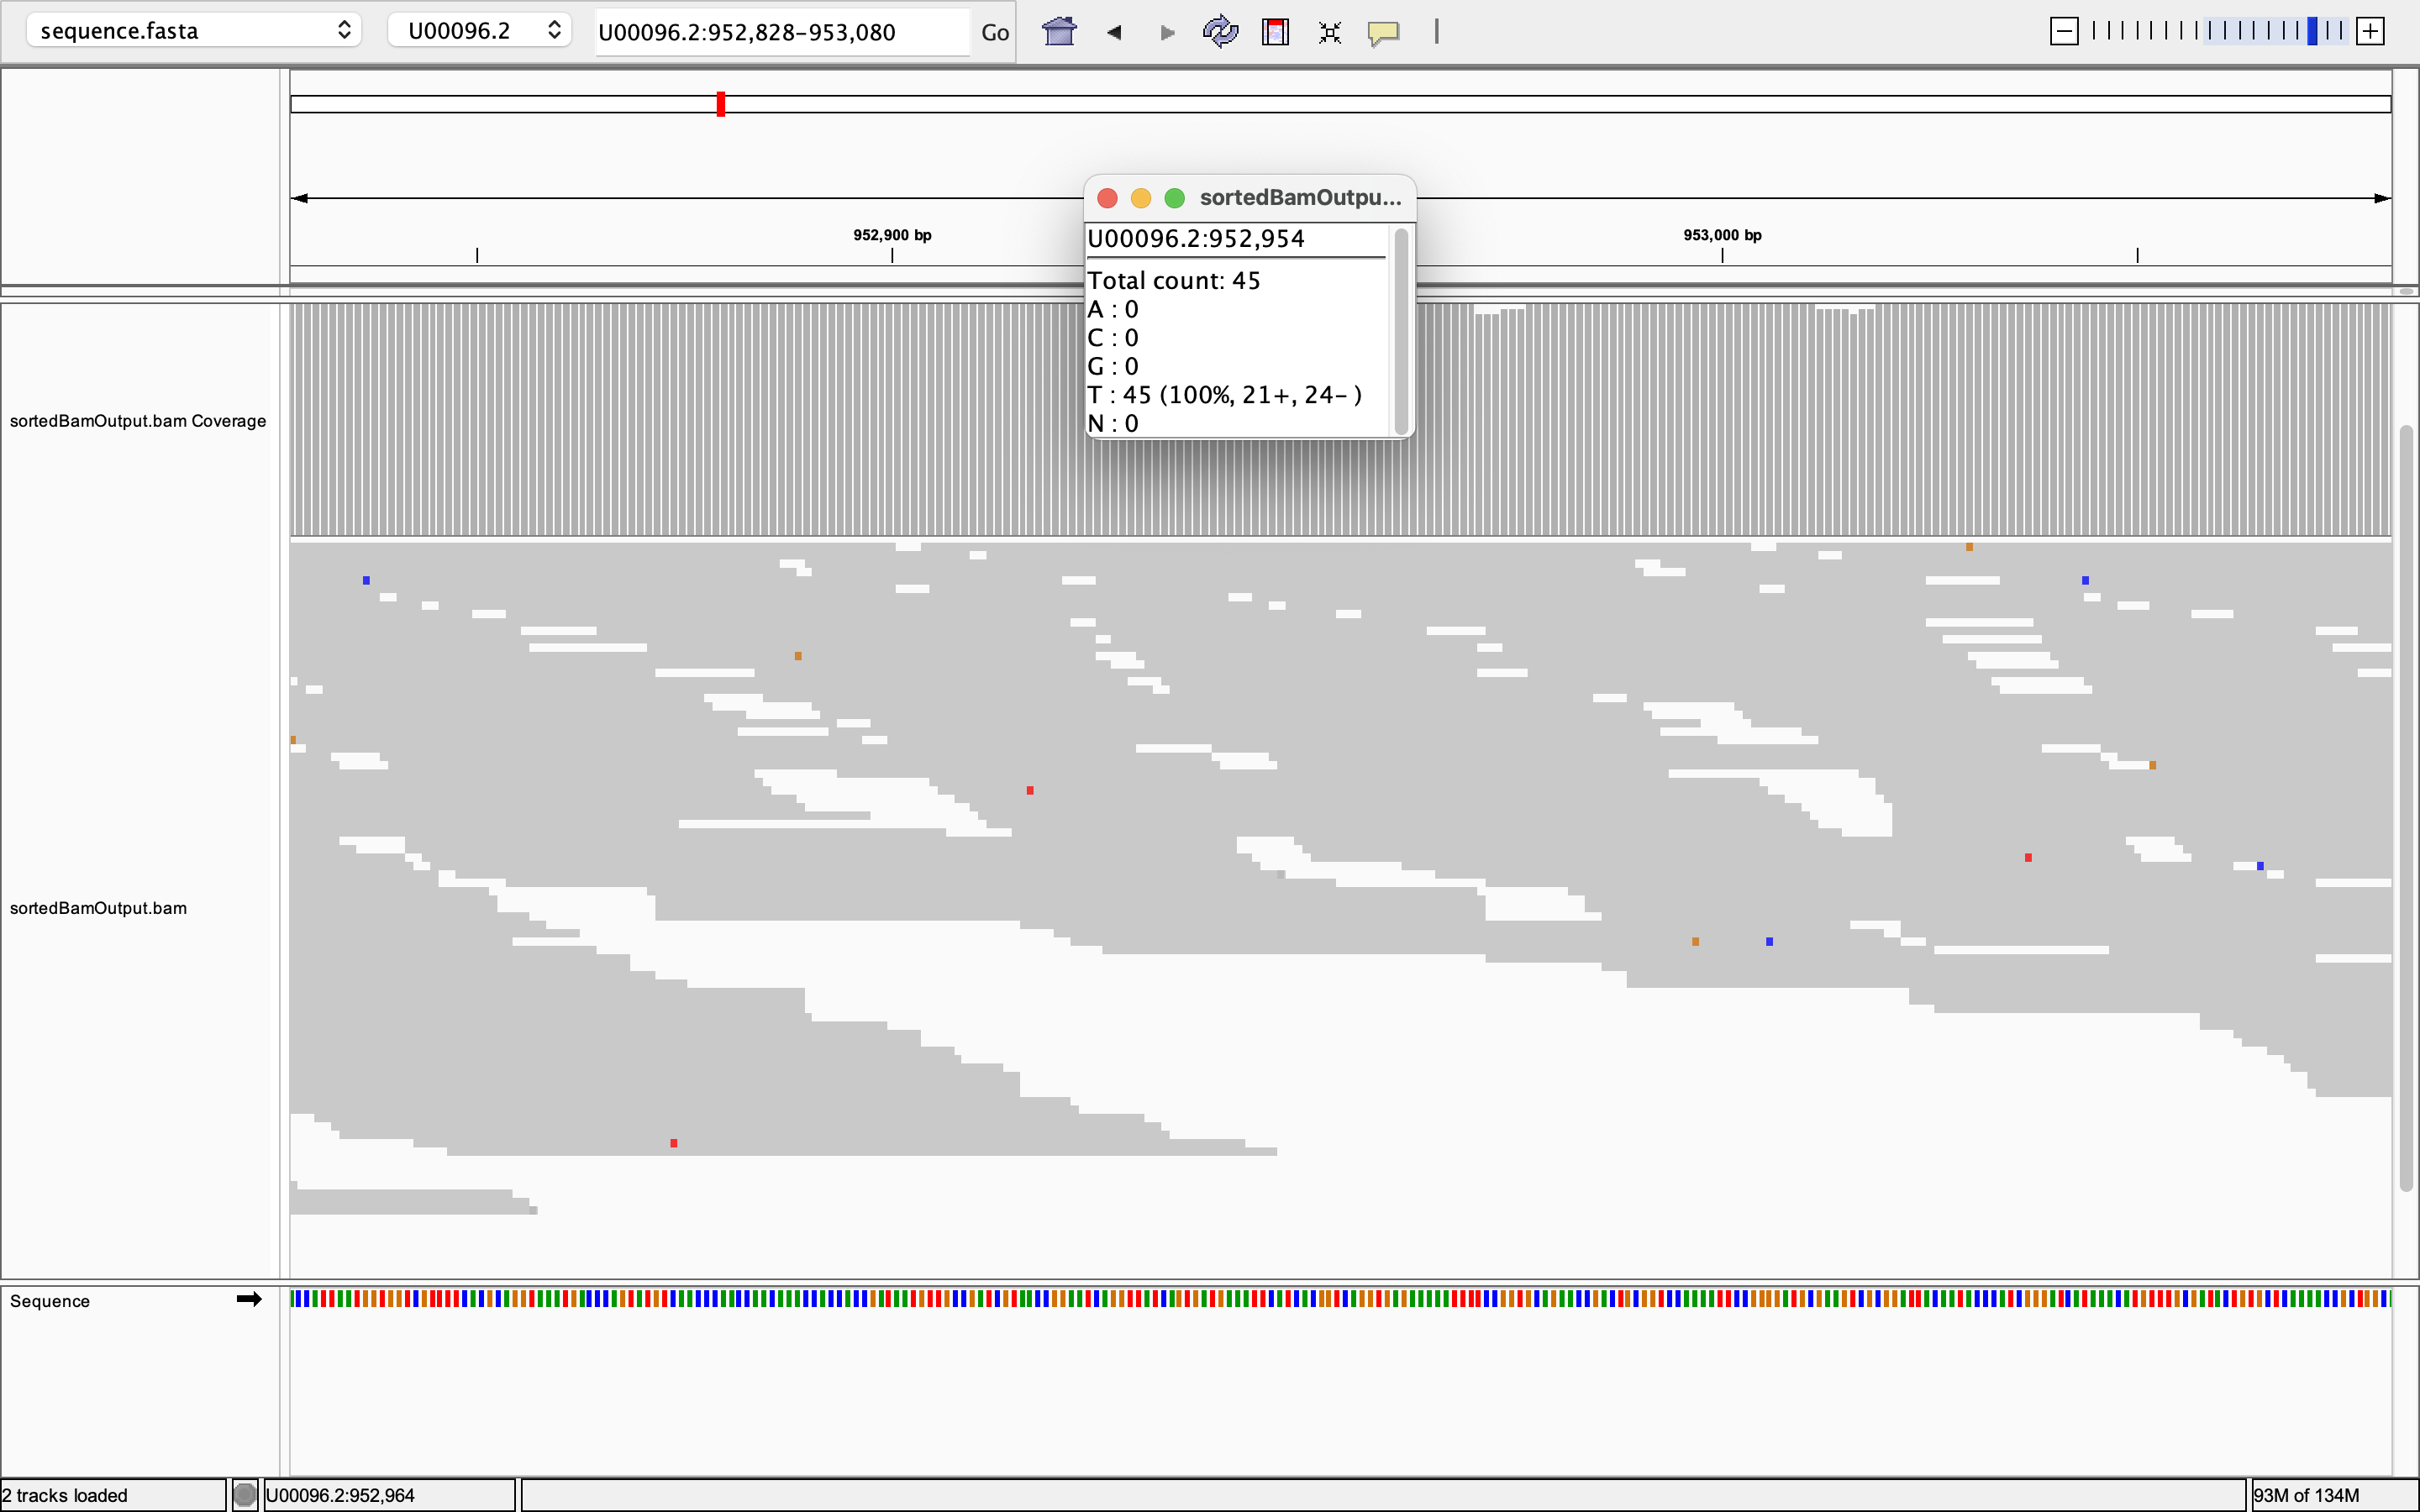

In [43]:
igv_dist = "IGV/igv_dist.png"
display.Image(igv_dist, width=500)

Interpretation of the above table is as follows:

<ul>
<li>
<b>U00096.2:952,954</b>:
This indicates the genomic location on the reference genome.
U00096.2 is likely a reference genome or gene identifier.
952,954 specifies the genomic coordinates.
</li><br>

<li>
<b>Total Count: 45</b>:
The total count represents the total number of reads or sequences that have been aligned to this specific genomic location.
</li><br>

<li>
<b>Nucleotide Distribution</b>:
A: 0<br>
C: 0<br>
G: 0<br>
T: 45 (100%, 21+, 24-)<br>
N: 0<br>
This section provides the distribution of nucleotides at the specified genomic position.
In this case, there are 45 reads in total. All 45 reads have T at this position and there is no unkonwn base in the reads.<br>
The breakdown of T reads is further detailed:

"100%" indicates that all 45 reads have a T at this position.
"21+" specifies that 21 reads have the T on the forward strand.
"24-" specifies that 24 reads have the T on the reverse strand.
</li>
</ul>

### <span style="color:#4287f5">5. percentage of short reads that are mapped to the reference genome</span>

The below command provides statistics on the alignment flags in the BAM file, including the number of mapped and unmapped reads.

<b>Interpret the output:</b>

Look for the line that starts with "in total." It will provide information on the total number of reads in the BAM file. Also, look for the line that starts with "mapped" to find the number of reads that were successfully mapped to the reference genome.(Which was obvious since all 100 bases of the read were mathced.)

\begin{equation*}
Percentage\;Mapped=(\frac{Total\;Number\;of\;Reads}{Number\;of\;Mapped\;Reads})\times 100
 \end{equation*}

In [44]:
! samtools flagstat ./alignmentResults/sortedBamOutput.bam

2297765 + 0 in total (QC-passed reads + QC-failed reads)
2297280 + 0 primary
0 + 0 secondary
485 + 0 supplementary
0 + 0 duplicates
0 + 0 primary duplicates
2294728 + 0 mapped (99.87% : N/A)
2294243 + 0 primary mapped (99.87% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


Thus, in our case, 99.87% of the reads were successfully mapped.

### <span style="color: #4287f5">6. Read depth</span>

The below command generates a depth file (depthOutput.txt) containing the read depth at each position of the reference genome.

In [45]:
! samtools depth ./alignmentResults/sortedBamOutput.bam > ./alignmentResults/depthOutput.txt

And the below command uses ```awk``` to calculate the mean depth by summing up the third column (depth) for each line and dividing by the total number of lines in the depth file.

In [46]:
! awk '{sum += $3} END {print "Mean Depth: " sum/NR}' ./alignmentResults/depthOutput.txt

Mean Depth: 49.2245


After running above commands, we have a file (```depthOutput.txt```) with read depth information at each position of the reference genome, and the mean depth is <b>49.2245</b>.

 The mean depth provides an average across all positions and may not be the same as the average coverage if the reference genome has regions with varying lengths.

### <span style="color: #4287f5">7. CIGAR format</span>

CIGAR foemat has some keys which are used in the encoded strings. Some of them are in the following:
<ul>
<li>S: Soft clipping</li><br>
<li>=: Match</li><br>
<li>X: Mismatch</li><br>
<li>M: Match</li><br>
<li>I: Insertion</li><br>
<li>D: Deletion</li><br>
<li>N: Gap</li><br>

</ul>

##### “29S21=1X25=”
The read starts with 29 soft-clipped bases which are not aligned to the reference, followed by a section where it matches the reference for 21 bases. Then, has a single mismatch, and finally, matches the reference again for 25 bases.

##### “20M2I1M1D10M”
The read starts with a match of 20 bases, followed by an insertion of 2 bases, then a match of 1 base, a deletion of 1 base, and finally, another match of 10 bases.

##### "5M10N25M"
The read starts with a match of 5 bases, then there is a gap of 10 bases in the alignment, and finally, there is another match of 25 bases.